In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import lightgbm as lgbm
from sklearn.metrics import log_loss
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import shutil
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import xlearn as xl

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('data/train/train.csv')
df = df[~pd.isnull(df.is_trade)]
item_category_list_unique = list(np.unique(df.item_category_list))
df.item_category_list.replace(item_category_list_unique, list(np.arange(len(item_category_list_unique))), inplace=True)

In [2]:
df2 = pd.read_csv('data/train/train2.csv')
df2 = df2[~pd.isnull(df2.is_trade)]
item_category_list_unique = list(np.unique(df2.item_category_list))
df2.item_category_list.replace(item_category_list_unique, list(np.arange(len(item_category_list_unique))), inplace=True)

In [4]:
def run(features, label, df, clf,verbose = True):
    X = df
    y = df[label]
    Loss = []
    T = X.context_timestamp <= '2018-09-23 23:59:59'
    X_train, X_test = X[T], X[~T]
    X_train, X_test = X_train[features], X_test[features]
    y_train, y_test = y[T], y[~T]
    clf.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_test, y_test)], eval_metric='logloss', verbose=verbose,early_stopping_rounds=200)
    predict = clf.predict_proba(X_test)[:,1]
    logloss = log_loss(y_test, predict)
    print(logloss)
    return clf

35
hour_map
[1]	training's binary_logloss: 0.648025	valid_1's binary_logloss: 0.647791
Training until validation scores don't improve for 200 rounds.
[2]	training's binary_logloss: 0.607201	valid_1's binary_logloss: 0.606748
[3]	training's binary_logloss: 0.570105	valid_1's binary_logloss: 0.569443
[4]	training's binary_logloss: 0.536266	valid_1's binary_logloss: 0.535403
[5]	training's binary_logloss: 0.505299	valid_1's binary_logloss: 0.504244
[6]	training's binary_logloss: 0.476876	valid_1's binary_logloss: 0.475636
[7]	training's binary_logloss: 0.45072	valid_1's binary_logloss: 0.449295
[8]	training's binary_logloss: 0.426598	valid_1's binary_logloss: 0.425005
[9]	training's binary_logloss: 0.404308	valid_1's binary_logloss: 0.40255
[10]	training's binary_logloss: 0.383672	valid_1's binary_logloss: 0.381755
[11]	training's binary_logloss: 0.364535	valid_1's binary_logloss: 0.362469
[12]	training's binary_logloss: 0.346767	valid_1's binary_logloss: 0.34455
[13]	training's binary_lo

[107]	training's binary_logloss: 0.0896129	valid_1's binary_logloss: 0.0818046
[108]	training's binary_logloss: 0.0895688	valid_1's binary_logloss: 0.0817543
[109]	training's binary_logloss: 0.0895103	valid_1's binary_logloss: 0.0816968
[110]	training's binary_logloss: 0.0894687	valid_1's binary_logloss: 0.081647
[111]	training's binary_logloss: 0.0894221	valid_1's binary_logloss: 0.0815955
[112]	training's binary_logloss: 0.0893802	valid_1's binary_logloss: 0.0815605
[113]	training's binary_logloss: 0.0893303	valid_1's binary_logloss: 0.08151
[114]	training's binary_logloss: 0.0892906	valid_1's binary_logloss: 0.0814697
[115]	training's binary_logloss: 0.0892554	valid_1's binary_logloss: 0.0814318
[116]	training's binary_logloss: 0.0892146	valid_1's binary_logloss: 0.0814014
[117]	training's binary_logloss: 0.089166	valid_1's binary_logloss: 0.0813602
[118]	training's binary_logloss: 0.0891222	valid_1's binary_logloss: 0.0813177
[119]	training's binary_logloss: 0.0890883	valid_1's bin

[212]	training's binary_logloss: 0.0873677	valid_1's binary_logloss: 0.0799658
[213]	training's binary_logloss: 0.0873576	valid_1's binary_logloss: 0.0799608
[214]	training's binary_logloss: 0.0873499	valid_1's binary_logloss: 0.0799563
[215]	training's binary_logloss: 0.0873395	valid_1's binary_logloss: 0.0799436
[216]	training's binary_logloss: 0.0873318	valid_1's binary_logloss: 0.0799381
[217]	training's binary_logloss: 0.0873241	valid_1's binary_logloss: 0.0799406
[218]	training's binary_logloss: 0.0873145	valid_1's binary_logloss: 0.0799367
[219]	training's binary_logloss: 0.0873029	valid_1's binary_logloss: 0.079933
[220]	training's binary_logloss: 0.0872933	valid_1's binary_logloss: 0.0799307
[221]	training's binary_logloss: 0.0872811	valid_1's binary_logloss: 0.0799283
[222]	training's binary_logloss: 0.0872725	valid_1's binary_logloss: 0.0799254
[223]	training's binary_logloss: 0.0872652	valid_1's binary_logloss: 0.0799226
[224]	training's binary_logloss: 0.0872561	valid_1's 

[317]	training's binary_logloss: 0.0866081	valid_1's binary_logloss: 0.0795908
[318]	training's binary_logloss: 0.0866013	valid_1's binary_logloss: 0.0795848
[319]	training's binary_logloss: 0.0865974	valid_1's binary_logloss: 0.0795844
[320]	training's binary_logloss: 0.0865925	valid_1's binary_logloss: 0.0795843
[321]	training's binary_logloss: 0.0865884	valid_1's binary_logloss: 0.0795824
[322]	training's binary_logloss: 0.0865837	valid_1's binary_logloss: 0.079577
[323]	training's binary_logloss: 0.0865796	valid_1's binary_logloss: 0.0795719
[324]	training's binary_logloss: 0.0865733	valid_1's binary_logloss: 0.0795682
[325]	training's binary_logloss: 0.0865676	valid_1's binary_logloss: 0.0795675
[326]	training's binary_logloss: 0.0865627	valid_1's binary_logloss: 0.0795695
[327]	training's binary_logloss: 0.0865559	valid_1's binary_logloss: 0.0795659
[328]	training's binary_logloss: 0.0865478	valid_1's binary_logloss: 0.079561
[329]	training's binary_logloss: 0.0865426	valid_1's b

[422]	training's binary_logloss: 0.0861233	valid_1's binary_logloss: 0.0794004
[423]	training's binary_logloss: 0.0861199	valid_1's binary_logloss: 0.0793964
[424]	training's binary_logloss: 0.0861169	valid_1's binary_logloss: 0.0793962
[425]	training's binary_logloss: 0.086112	valid_1's binary_logloss: 0.0793939
[426]	training's binary_logloss: 0.0861051	valid_1's binary_logloss: 0.0793934
[427]	training's binary_logloss: 0.0861	valid_1's binary_logloss: 0.0793931
[428]	training's binary_logloss: 0.0860972	valid_1's binary_logloss: 0.0793917
[429]	training's binary_logloss: 0.0860926	valid_1's binary_logloss: 0.0793909
[430]	training's binary_logloss: 0.0860883	valid_1's binary_logloss: 0.0793921
[431]	training's binary_logloss: 0.086086	valid_1's binary_logloss: 0.0793922
[432]	training's binary_logloss: 0.0860792	valid_1's binary_logloss: 0.0793928
[433]	training's binary_logloss: 0.0860768	valid_1's binary_logloss: 0.0793918
[434]	training's binary_logloss: 0.0860729	valid_1's bina

[527]	training's binary_logloss: 0.0857323	valid_1's binary_logloss: 0.0792793
[528]	training's binary_logloss: 0.0857286	valid_1's binary_logloss: 0.07928
[529]	training's binary_logloss: 0.0857264	valid_1's binary_logloss: 0.0792801
[530]	training's binary_logloss: 0.0857225	valid_1's binary_logloss: 0.0792757
[531]	training's binary_logloss: 0.0857187	valid_1's binary_logloss: 0.0792769
[532]	training's binary_logloss: 0.0857136	valid_1's binary_logloss: 0.0792759
[533]	training's binary_logloss: 0.0857105	valid_1's binary_logloss: 0.0792769
[534]	training's binary_logloss: 0.085706	valid_1's binary_logloss: 0.0792774
[535]	training's binary_logloss: 0.0857017	valid_1's binary_logloss: 0.0792781
[536]	training's binary_logloss: 0.0856996	valid_1's binary_logloss: 0.0792764
[537]	training's binary_logloss: 0.0856957	valid_1's binary_logloss: 0.0792769
[538]	training's binary_logloss: 0.0856938	valid_1's binary_logloss: 0.0792744
[539]	training's binary_logloss: 0.0856898	valid_1's bi

[632]	training's binary_logloss: 0.0854004	valid_1's binary_logloss: 0.079203
[633]	training's binary_logloss: 0.0853989	valid_1's binary_logloss: 0.0792022
[634]	training's binary_logloss: 0.0853956	valid_1's binary_logloss: 0.0791985
[635]	training's binary_logloss: 0.0853936	valid_1's binary_logloss: 0.0791982
[636]	training's binary_logloss: 0.0853903	valid_1's binary_logloss: 0.079196
[637]	training's binary_logloss: 0.0853868	valid_1's binary_logloss: 0.0791917
[638]	training's binary_logloss: 0.0853824	valid_1's binary_logloss: 0.079192
[639]	training's binary_logloss: 0.0853785	valid_1's binary_logloss: 0.0791898
[640]	training's binary_logloss: 0.0853767	valid_1's binary_logloss: 0.0791917
[641]	training's binary_logloss: 0.0853737	valid_1's binary_logloss: 0.0791904
[642]	training's binary_logloss: 0.0853715	valid_1's binary_logloss: 0.0791928
[643]	training's binary_logloss: 0.0853709	valid_1's binary_logloss: 0.0791919
[644]	training's binary_logloss: 0.0853694	valid_1's bi

[736]	training's binary_logloss: 0.0851222	valid_1's binary_logloss: 0.0791261
[737]	training's binary_logloss: 0.0851196	valid_1's binary_logloss: 0.0791207
[738]	training's binary_logloss: 0.0851174	valid_1's binary_logloss: 0.0791183
[739]	training's binary_logloss: 0.0851151	valid_1's binary_logloss: 0.0791205
[740]	training's binary_logloss: 0.085112	valid_1's binary_logloss: 0.079122
[741]	training's binary_logloss: 0.0851096	valid_1's binary_logloss: 0.0791212
[742]	training's binary_logloss: 0.0851078	valid_1's binary_logloss: 0.0791211
[743]	training's binary_logloss: 0.0851057	valid_1's binary_logloss: 0.0791212
[744]	training's binary_logloss: 0.0851033	valid_1's binary_logloss: 0.0791193
[745]	training's binary_logloss: 0.0851019	valid_1's binary_logloss: 0.0791208
[746]	training's binary_logloss: 0.0850992	valid_1's binary_logloss: 0.0791207
[747]	training's binary_logloss: 0.0850977	valid_1's binary_logloss: 0.0791216
[748]	training's binary_logloss: 0.0850961	valid_1's b

[840]	training's binary_logloss: 0.0848803	valid_1's binary_logloss: 0.0790735
[841]	training's binary_logloss: 0.0848782	valid_1's binary_logloss: 0.0790752
[842]	training's binary_logloss: 0.0848762	valid_1's binary_logloss: 0.0790749
[843]	training's binary_logloss: 0.0848728	valid_1's binary_logloss: 0.0790712
[844]	training's binary_logloss: 0.0848701	valid_1's binary_logloss: 0.0790695
[845]	training's binary_logloss: 0.0848678	valid_1's binary_logloss: 0.0790696
[846]	training's binary_logloss: 0.0848655	valid_1's binary_logloss: 0.0790689
[847]	training's binary_logloss: 0.0848626	valid_1's binary_logloss: 0.0790695
[848]	training's binary_logloss: 0.084859	valid_1's binary_logloss: 0.0790671
[849]	training's binary_logloss: 0.0848573	valid_1's binary_logloss: 0.0790665
[850]	training's binary_logloss: 0.0848533	valid_1's binary_logloss: 0.0790616
[851]	training's binary_logloss: 0.0848505	valid_1's binary_logloss: 0.0790614
[852]	training's binary_logloss: 0.0848477	valid_1's 

[944]	training's binary_logloss: 0.0846389	valid_1's binary_logloss: 0.0790623
[945]	training's binary_logloss: 0.0846382	valid_1's binary_logloss: 0.0790629
[946]	training's binary_logloss: 0.0846376	valid_1's binary_logloss: 0.079062
[947]	training's binary_logloss: 0.0846355	valid_1's binary_logloss: 0.0790625
[948]	training's binary_logloss: 0.084633	valid_1's binary_logloss: 0.079062
[949]	training's binary_logloss: 0.0846319	valid_1's binary_logloss: 0.0790642
[950]	training's binary_logloss: 0.084629	valid_1's binary_logloss: 0.079061
[951]	training's binary_logloss: 0.0846272	valid_1's binary_logloss: 0.07906
[952]	training's binary_logloss: 0.0846251	valid_1's binary_logloss: 0.0790561
[953]	training's binary_logloss: 0.0846229	valid_1's binary_logloss: 0.0790563
[954]	training's binary_logloss: 0.0846212	valid_1's binary_logloss: 0.0790532
[955]	training's binary_logloss: 0.0846197	valid_1's binary_logloss: 0.0790532
[956]	training's binary_logloss: 0.0846159	valid_1's binary

[1050]	training's binary_logloss: 0.0844157	valid_1's binary_logloss: 0.0790394
[1051]	training's binary_logloss: 0.0844129	valid_1's binary_logloss: 0.0790389
[1052]	training's binary_logloss: 0.0844105	valid_1's binary_logloss: 0.0790389
[1053]	training's binary_logloss: 0.0844086	valid_1's binary_logloss: 0.0790394
[1054]	training's binary_logloss: 0.0844035	valid_1's binary_logloss: 0.0790381
[1055]	training's binary_logloss: 0.0844002	valid_1's binary_logloss: 0.0790371
[1056]	training's binary_logloss: 0.0843966	valid_1's binary_logloss: 0.0790346
[1057]	training's binary_logloss: 0.0843946	valid_1's binary_logloss: 0.0790335
[1058]	training's binary_logloss: 0.0843927	valid_1's binary_logloss: 0.0790333
[1059]	training's binary_logloss: 0.0843907	valid_1's binary_logloss: 0.0790319
[1060]	training's binary_logloss: 0.0843898	valid_1's binary_logloss: 0.0790315
[1061]	training's binary_logloss: 0.0843878	valid_1's binary_logloss: 0.0790305
[1062]	training's binary_logloss: 0.0843

[1153]	training's binary_logloss: 0.0841911	valid_1's binary_logloss: 0.0790325
[1154]	training's binary_logloss: 0.0841903	valid_1's binary_logloss: 0.0790332
[1155]	training's binary_logloss: 0.0841883	valid_1's binary_logloss: 0.0790333
[1156]	training's binary_logloss: 0.0841879	valid_1's binary_logloss: 0.0790327
[1157]	training's binary_logloss: 0.0841854	valid_1's binary_logloss: 0.0790334
[1158]	training's binary_logloss: 0.0841841	valid_1's binary_logloss: 0.0790303
[1159]	training's binary_logloss: 0.0841824	valid_1's binary_logloss: 0.0790287
[1160]	training's binary_logloss: 0.0841804	valid_1's binary_logloss: 0.079029
[1161]	training's binary_logloss: 0.0841789	valid_1's binary_logloss: 0.0790321
[1162]	training's binary_logloss: 0.0841766	valid_1's binary_logloss: 0.0790311
[1163]	training's binary_logloss: 0.0841747	valid_1's binary_logloss: 0.0790314
[1164]	training's binary_logloss: 0.0841744	valid_1's binary_logloss: 0.0790311
[1165]	training's binary_logloss: 0.08417

[1256]	training's binary_logloss: 0.0839811	valid_1's binary_logloss: 0.0790206
[1257]	training's binary_logloss: 0.0839776	valid_1's binary_logloss: 0.0790201
[1258]	training's binary_logloss: 0.083975	valid_1's binary_logloss: 0.0790215
[1259]	training's binary_logloss: 0.0839732	valid_1's binary_logloss: 0.0790213
[1260]	training's binary_logloss: 0.0839705	valid_1's binary_logloss: 0.0790222
[1261]	training's binary_logloss: 0.0839682	valid_1's binary_logloss: 0.0790218
[1262]	training's binary_logloss: 0.0839645	valid_1's binary_logloss: 0.0790203
[1263]	training's binary_logloss: 0.0839625	valid_1's binary_logloss: 0.0790168
[1264]	training's binary_logloss: 0.0839607	valid_1's binary_logloss: 0.0790183
[1265]	training's binary_logloss: 0.0839589	valid_1's binary_logloss: 0.0790187
[1266]	training's binary_logloss: 0.0839562	valid_1's binary_logloss: 0.0790203
[1267]	training's binary_logloss: 0.0839545	valid_1's binary_logloss: 0.0790182
[1268]	training's binary_logloss: 0.08395

[1360]	training's binary_logloss: 0.0837661	valid_1's binary_logloss: 0.0789847
[1361]	training's binary_logloss: 0.0837645	valid_1's binary_logloss: 0.0789862
[1362]	training's binary_logloss: 0.0837636	valid_1's binary_logloss: 0.0789853
[1363]	training's binary_logloss: 0.0837607	valid_1's binary_logloss: 0.078983
[1364]	training's binary_logloss: 0.0837592	valid_1's binary_logloss: 0.0789829
[1365]	training's binary_logloss: 0.0837573	valid_1's binary_logloss: 0.0789821
[1366]	training's binary_logloss: 0.0837555	valid_1's binary_logloss: 0.0789824
[1367]	training's binary_logloss: 0.0837524	valid_1's binary_logloss: 0.0789827
[1368]	training's binary_logloss: 0.0837499	valid_1's binary_logloss: 0.0789825
[1369]	training's binary_logloss: 0.0837471	valid_1's binary_logloss: 0.0789819
[1370]	training's binary_logloss: 0.0837456	valid_1's binary_logloss: 0.0789821
[1371]	training's binary_logloss: 0.0837442	valid_1's binary_logloss: 0.0789848
[1372]	training's binary_logloss: 0.08374

[1463]	training's binary_logloss: 0.0835432	valid_1's binary_logloss: 0.0789716
[1464]	training's binary_logloss: 0.0835412	valid_1's binary_logloss: 0.0789706
[1465]	training's binary_logloss: 0.0835388	valid_1's binary_logloss: 0.0789739
[1466]	training's binary_logloss: 0.0835348	valid_1's binary_logloss: 0.0789749
[1467]	training's binary_logloss: 0.0835329	valid_1's binary_logloss: 0.0789756
[1468]	training's binary_logloss: 0.0835306	valid_1's binary_logloss: 0.0789771
[1469]	training's binary_logloss: 0.083529	valid_1's binary_logloss: 0.0789761
[1470]	training's binary_logloss: 0.0835277	valid_1's binary_logloss: 0.0789774
[1471]	training's binary_logloss: 0.0835252	valid_1's binary_logloss: 0.0789775
[1472]	training's binary_logloss: 0.0835232	valid_1's binary_logloss: 0.0789798
[1473]	training's binary_logloss: 0.0835228	valid_1's binary_logloss: 0.0789802
[1474]	training's binary_logloss: 0.0835204	valid_1's binary_logloss: 0.0789777
[1475]	training's binary_logloss: 0.08351

[1566]	training's binary_logloss: 0.0833407	valid_1's binary_logloss: 0.0789516
[1567]	training's binary_logloss: 0.0833403	valid_1's binary_logloss: 0.0789505
[1568]	training's binary_logloss: 0.0833382	valid_1's binary_logloss: 0.078947
[1569]	training's binary_logloss: 0.0833367	valid_1's binary_logloss: 0.0789455
[1570]	training's binary_logloss: 0.0833347	valid_1's binary_logloss: 0.0789465
[1571]	training's binary_logloss: 0.0833341	valid_1's binary_logloss: 0.0789468
[1572]	training's binary_logloss: 0.0833318	valid_1's binary_logloss: 0.0789457
[1573]	training's binary_logloss: 0.0833292	valid_1's binary_logloss: 0.0789457
[1574]	training's binary_logloss: 0.0833278	valid_1's binary_logloss: 0.0789461
[1575]	training's binary_logloss: 0.0833255	valid_1's binary_logloss: 0.0789477
[1576]	training's binary_logloss: 0.083323	valid_1's binary_logloss: 0.0789468
[1577]	training's binary_logloss: 0.0833207	valid_1's binary_logloss: 0.0789469
[1578]	training's binary_logloss: 0.083318

[1669]	training's binary_logloss: 0.0831521	valid_1's binary_logloss: 0.0789275
[1670]	training's binary_logloss: 0.083151	valid_1's binary_logloss: 0.0789293
[1671]	training's binary_logloss: 0.0831487	valid_1's binary_logloss: 0.0789301
[1672]	training's binary_logloss: 0.0831463	valid_1's binary_logloss: 0.0789297
[1673]	training's binary_logloss: 0.0831444	valid_1's binary_logloss: 0.0789298
[1674]	training's binary_logloss: 0.0831424	valid_1's binary_logloss: 0.0789288
[1675]	training's binary_logloss: 0.0831401	valid_1's binary_logloss: 0.078929
[1676]	training's binary_logloss: 0.0831385	valid_1's binary_logloss: 0.0789301
[1677]	training's binary_logloss: 0.0831362	valid_1's binary_logloss: 0.0789321
[1678]	training's binary_logloss: 0.0831343	valid_1's binary_logloss: 0.0789315
[1679]	training's binary_logloss: 0.083133	valid_1's binary_logloss: 0.078932
[1680]	training's binary_logloss: 0.0831308	valid_1's binary_logloss: 0.078933
[1681]	training's binary_logloss: 0.0831295	v

[1773]	training's binary_logloss: 0.0829559	valid_1's binary_logloss: 0.0789291
[1774]	training's binary_logloss: 0.0829548	valid_1's binary_logloss: 0.078929
[1775]	training's binary_logloss: 0.0829544	valid_1's binary_logloss: 0.0789298
[1776]	training's binary_logloss: 0.0829537	valid_1's binary_logloss: 0.0789301
[1777]	training's binary_logloss: 0.082952	valid_1's binary_logloss: 0.0789286
[1778]	training's binary_logloss: 0.0829499	valid_1's binary_logloss: 0.078931
[1779]	training's binary_logloss: 0.0829473	valid_1's binary_logloss: 0.0789302
[1780]	training's binary_logloss: 0.0829448	valid_1's binary_logloss: 0.0789301
[1781]	training's binary_logloss: 0.082943	valid_1's binary_logloss: 0.0789309
[1782]	training's binary_logloss: 0.0829413	valid_1's binary_logloss: 0.0789298
[1783]	training's binary_logloss: 0.08294	valid_1's binary_logloss: 0.0789297
[1784]	training's binary_logloss: 0.0829382	valid_1's binary_logloss: 0.0789306
[1785]	training's binary_logloss: 0.0829361	va

[1878]	training's binary_logloss: 0.0827744	valid_1's binary_logloss: 0.0789116
[1879]	training's binary_logloss: 0.0827712	valid_1's binary_logloss: 0.0789122
[1880]	training's binary_logloss: 0.0827706	valid_1's binary_logloss: 0.0789124
[1881]	training's binary_logloss: 0.0827689	valid_1's binary_logloss: 0.0789132
[1882]	training's binary_logloss: 0.0827675	valid_1's binary_logloss: 0.0789126
[1883]	training's binary_logloss: 0.0827665	valid_1's binary_logloss: 0.0789138
[1884]	training's binary_logloss: 0.0827632	valid_1's binary_logloss: 0.0789158
[1885]	training's binary_logloss: 0.0827616	valid_1's binary_logloss: 0.0789152
[1886]	training's binary_logloss: 0.0827599	valid_1's binary_logloss: 0.0789155
[1887]	training's binary_logloss: 0.0827581	valid_1's binary_logloss: 0.0789169
[1888]	training's binary_logloss: 0.0827566	valid_1's binary_logloss: 0.0789167
[1889]	training's binary_logloss: 0.0827545	valid_1's binary_logloss: 0.0789169
[1890]	training's binary_logloss: 0.0827

[1981]	training's binary_logloss: 0.0825973	valid_1's binary_logloss: 0.0789017
[1982]	training's binary_logloss: 0.0825958	valid_1's binary_logloss: 0.0788955
[1983]	training's binary_logloss: 0.0825951	valid_1's binary_logloss: 0.0788953
[1984]	training's binary_logloss: 0.0825929	valid_1's binary_logloss: 0.0788957
[1985]	training's binary_logloss: 0.0825914	valid_1's binary_logloss: 0.0788973
[1986]	training's binary_logloss: 0.0825894	valid_1's binary_logloss: 0.0788987
[1987]	training's binary_logloss: 0.0825878	valid_1's binary_logloss: 0.0788983
[1988]	training's binary_logloss: 0.0825858	valid_1's binary_logloss: 0.078897
[1989]	training's binary_logloss: 0.0825847	valid_1's binary_logloss: 0.078897
[1990]	training's binary_logloss: 0.0825828	valid_1's binary_logloss: 0.0788964
[1991]	training's binary_logloss: 0.0825815	valid_1's binary_logloss: 0.0788941
[1992]	training's binary_logloss: 0.0825799	valid_1's binary_logloss: 0.0788932
[1993]	training's binary_logloss: 0.082577

[2084]	training's binary_logloss: 0.082414	valid_1's binary_logloss: 0.0788911
[2085]	training's binary_logloss: 0.0824112	valid_1's binary_logloss: 0.0788879
[2086]	training's binary_logloss: 0.0824095	valid_1's binary_logloss: 0.0788883
[2087]	training's binary_logloss: 0.0824076	valid_1's binary_logloss: 0.0788882
[2088]	training's binary_logloss: 0.0824067	valid_1's binary_logloss: 0.0788874
[2089]	training's binary_logloss: 0.0824052	valid_1's binary_logloss: 0.0788869
[2090]	training's binary_logloss: 0.0824036	valid_1's binary_logloss: 0.078886
[2091]	training's binary_logloss: 0.0824025	valid_1's binary_logloss: 0.0788854
[2092]	training's binary_logloss: 0.0824004	valid_1's binary_logloss: 0.0788862
[2093]	training's binary_logloss: 0.0824	valid_1's binary_logloss: 0.0788861
[2094]	training's binary_logloss: 0.0823988	valid_1's binary_logloss: 0.0788848
[2095]	training's binary_logloss: 0.0823985	valid_1's binary_logloss: 0.0788845
[2096]	training's binary_logloss: 0.0823975	v

[2188]	training's binary_logloss: 0.0822492	valid_1's binary_logloss: 0.0788941
[2189]	training's binary_logloss: 0.082248	valid_1's binary_logloss: 0.0788944
[2190]	training's binary_logloss: 0.0822462	valid_1's binary_logloss: 0.0788943
[2191]	training's binary_logloss: 0.0822447	valid_1's binary_logloss: 0.0788964
[2192]	training's binary_logloss: 0.0822426	valid_1's binary_logloss: 0.0788928
[2193]	training's binary_logloss: 0.082241	valid_1's binary_logloss: 0.0788909
[2194]	training's binary_logloss: 0.0822397	valid_1's binary_logloss: 0.078891
[2195]	training's binary_logloss: 0.082238	valid_1's binary_logloss: 0.0788906
[2196]	training's binary_logloss: 0.082236	valid_1's binary_logloss: 0.0788886
[2197]	training's binary_logloss: 0.0822344	valid_1's binary_logloss: 0.0788886
[2198]	training's binary_logloss: 0.0822333	valid_1's binary_logloss: 0.0788889
[2199]	training's binary_logloss: 0.0822322	valid_1's binary_logloss: 0.0788892
[2200]	training's binary_logloss: 0.0822306	v

[2291]	training's binary_logloss: 0.0820792	valid_1's binary_logloss: 0.0789119
[2292]	training's binary_logloss: 0.0820773	valid_1's binary_logloss: 0.0789113
[2293]	training's binary_logloss: 0.0820746	valid_1's binary_logloss: 0.0789125
[2294]	training's binary_logloss: 0.0820731	valid_1's binary_logloss: 0.0789099
[2295]	training's binary_logloss: 0.0820714	valid_1's binary_logloss: 0.0789119
[2296]	training's binary_logloss: 0.0820699	valid_1's binary_logloss: 0.0789119
[2297]	training's binary_logloss: 0.0820682	valid_1's binary_logloss: 0.0789141
[2298]	training's binary_logloss: 0.0820665	valid_1's binary_logloss: 0.0789131
[2299]	training's binary_logloss: 0.0820652	valid_1's binary_logloss: 0.0789127
[2300]	training's binary_logloss: 0.0820636	valid_1's binary_logloss: 0.0789117
[2301]	training's binary_logloss: 0.0820614	valid_1's binary_logloss: 0.0789101
[2302]	training's binary_logloss: 0.0820596	valid_1's binary_logloss: 0.0789098
[2303]	training's binary_logloss: 0.0820

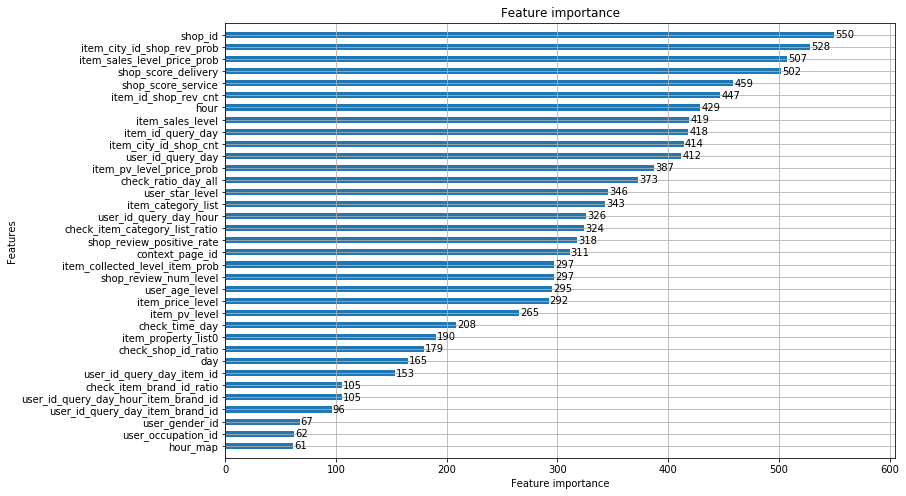

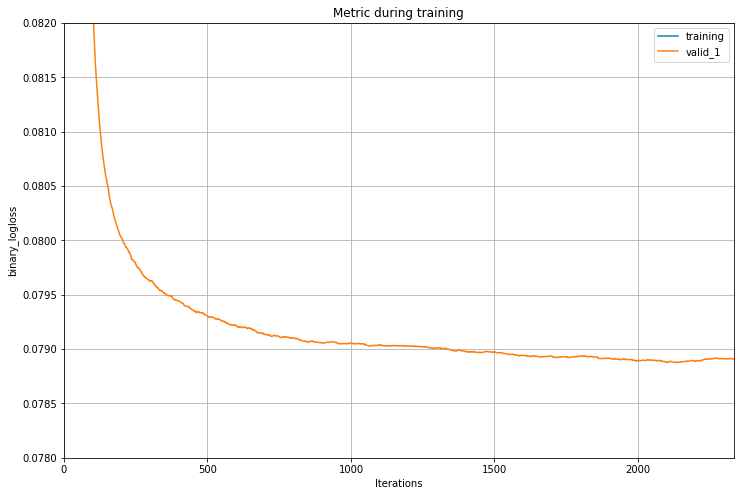

In [130]:
label = 'is_trade'
start_features = ['item_category_list', 
                  'item_price_level', 
                  'item_sales_level', 
                  #'item_collected_level', 
                  'item_pv_level', 
                  'user_gender_id', 
                  'user_age_level', 
                  'user_occupation_id', 
                  'user_star_level', 
                  'context_page_id', 
                  'shop_review_num_level', 
                  'shop_review_positive_rate', 
                  'shop_score_service', 
                  'shop_score_delivery', 
                  'hour', 
                  'day', 
                  'user_id_query_day_hour', 
                  'shop_id', 
                  'item_id_query_day', 
                  'user_id_query_day_item_brand_id', 
                  'user_id_query_day_hour_item_brand_id', 
                  'user_id_query_day',
                  #'item_brand_id',
                  'user_id_query_day_item_id', 
                  'check_item_brand_id_ratio',
                  'check_shop_id_ratio', 
                  'check_item_category_list_ratio', 
                  'check_ratio_day_all', 
                  'check_time_day', 
                  'item_city_id_shop_cnt', 
                  'item_city_id_shop_rev_prob', 
                  'item_id_shop_rev_cnt', 
                  'item_property_list0', 
                  'item_pv_level_price_prob', 
                  'item_collected_level_item_prob',
                  'item_sales_level_price_prob',
                  'hour_map'
                 ]
print(len(start_features))
clf = lgbm.LGBMClassifier(random_state=1, num_leaves = 6,
                          n_estimators=5000,max_depth=3,learning_rate = 0.05, 
                          n_jobs=30)

clf = run(start_features, label, df, clf, True)
lgbm.plot_importance(clf,figsize=(12,8),height=0.5)
plt.show()
lgbm.plot_metric(clf,figsize=(12,8),ylim=(0.078,0.082))
plt.show()

In [10]:
df = df[~pd.isnull(df.is_trade)]

In [11]:
item_category_list_unique = list(np.unique(df.item_category_list))
df.item_category_list.replace(item_category_list_unique, list(np.arange(len(item_category_list_unique))), inplace=True)

In [129]:
label = 'is_trade'
start_features = ['item_category_list', 
                  'item_price_level', 
                  'item_sales_level', 
                  #'item_collected_level', 
                  'item_pv_level', 
                  'user_gender_id', 
                  'user_age_level', 
                  'user_occupation_id', 
                  'user_star_level', 
                  'context_page_id', 
                  'shop_review_num_level', 
                  'shop_review_positive_rate', 
                  'shop_score_service', 
                  'shop_score_delivery', 
                  'hour', 
                  'day', 
                  'user_id_query_day_hour', 
                  'shop_id', 
                  'item_id_query_day', 
                  'user_id_query_day_item_brand_id', 
                  'user_id_query_day_hour_item_brand_id', 
                  'user_id_query_day',
                  #'item_brand_id',
                  'user_id_query_day_item_id', 
                  'check_item_brand_id_ratio',
                  'check_shop_id_ratio', 
                  'check_item_category_list_ratio', 
                  'check_ratio_day_all', 
                  'check_time_day', 
                  'item_city_id_shop_cnt', 
                  'item_city_id_shop_rev_prob', 
                  'item_id_shop_rev_cnt', 
                  'item_property_list0', 
                  'item_pv_level_price_prob', 
                  'item_collected_level_item_prob',
                 'item_sales_level_price_prob',
                  'hour_map'
                 ]

for i in start_features[:]:
    x = start_features[:]
    x.remove(i)
    print(i)
    clf = lgbm.LGBMClassifier(random_state=1, num_leaves = 6,
                          n_estimators=5000,max_depth=3,learning_rate = 0.05, 
                          n_jobs=30)

    clf = run(x, label, df, clf, False)

lgbm.plot_metric(clf,figsize=(12,8),ylim=(0.078,0.082))
plt.show()
fe = np.array(start_features)[np.argsort(clf.feature_importances_)][::-1]
for i,j in zip(fe, clf.feature_importances_[np.argsort(clf.feature_importances_)][::-1]):
    print('{}: {}'.format(i,j / np.sum(clf.feature_importances_)))

item_category_list
hour_map
0.07908337250089897
item_price_level
hour_map
0.07898326541487258
item_sales_level
hour_map
0.07933206256423324
item_collected_level
hour_map
0.07887566794491502
item_pv_level
hour_map
0.07888494646436925
user_gender_id
hour_map
0.07897607849879151
user_age_level
hour_map
0.07907987527332835
user_occupation_id
hour_map
0.07889917440032053
user_star_level
hour_map
0.07909446817772402
context_page_id
hour_map


KeyboardInterrupt: 

best update: 0.07962037953591194 -> 0.08154 

best update 0.07953425004195597 -> 0.08147 

best update: 0.079103 -> 0.08104

36
item_sales_level_price_prob
[1]	training's binary_logloss: 0.648025	valid_1's binary_logloss: 0.647791
Training until validation scores don't improve for 200 rounds.
[2]	training's binary_logloss: 0.607201	valid_1's binary_logloss: 0.606748
[3]	training's binary_logloss: 0.570105	valid_1's binary_logloss: 0.569443
[4]	training's binary_logloss: 0.536266	valid_1's binary_logloss: 0.535403
[5]	training's binary_logloss: 0.505299	valid_1's binary_logloss: 0.504244
[6]	training's binary_logloss: 0.476876	valid_1's binary_logloss: 0.475636
[7]	training's binary_logloss: 0.45072	valid_1's binary_logloss: 0.449295
[8]	training's binary_logloss: 0.426598	valid_1's binary_logloss: 0.425005
[9]	training's binary_logloss: 0.404308	valid_1's binary_logloss: 0.40255
[10]	training's binary_logloss: 0.383672	valid_1's binary_logloss: 0.381755
[11]	training's binary_logloss: 0.364535	valid_1's binary_logloss: 0.362469
[12]	training's binary_logloss: 0.346767	valid_1's binary_logloss: 0.34455
[13]	t

[108]	training's binary_logloss: 0.0895835	valid_1's binary_logloss: 0.0817644
[109]	training's binary_logloss: 0.0895307	valid_1's binary_logloss: 0.0817101
[110]	training's binary_logloss: 0.0894828	valid_1's binary_logloss: 0.0816569
[111]	training's binary_logloss: 0.0894386	valid_1's binary_logloss: 0.0816225
[112]	training's binary_logloss: 0.0893883	valid_1's binary_logloss: 0.081571
[113]	training's binary_logloss: 0.0893477	valid_1's binary_logloss: 0.0815296
[114]	training's binary_logloss: 0.0892974	valid_1's binary_logloss: 0.0814839
[115]	training's binary_logloss: 0.0892623	valid_1's binary_logloss: 0.0814473
[116]	training's binary_logloss: 0.0892158	valid_1's binary_logloss: 0.0813972
[117]	training's binary_logloss: 0.0891774	valid_1's binary_logloss: 0.0813617
[118]	training's binary_logloss: 0.0891458	valid_1's binary_logloss: 0.0813227
[119]	training's binary_logloss: 0.0891021	valid_1's binary_logloss: 0.0812755
[120]	training's binary_logloss: 0.0890599	valid_1's 

[213]	training's binary_logloss: 0.087349	valid_1's binary_logloss: 0.0799334
[214]	training's binary_logloss: 0.0873406	valid_1's binary_logloss: 0.0799324
[215]	training's binary_logloss: 0.0873305	valid_1's binary_logloss: 0.0799267
[216]	training's binary_logloss: 0.0873221	valid_1's binary_logloss: 0.0799253
[217]	training's binary_logloss: 0.0873071	valid_1's binary_logloss: 0.079916
[218]	training's binary_logloss: 0.0872935	valid_1's binary_logloss: 0.0799047
[219]	training's binary_logloss: 0.087286	valid_1's binary_logloss: 0.0798987
[220]	training's binary_logloss: 0.087277	valid_1's binary_logloss: 0.079895
[221]	training's binary_logloss: 0.0872657	valid_1's binary_logloss: 0.0798943
[222]	training's binary_logloss: 0.0872574	valid_1's binary_logloss: 0.079887
[223]	training's binary_logloss: 0.0872469	valid_1's binary_logloss: 0.0798772
[224]	training's binary_logloss: 0.0872399	valid_1's binary_logloss: 0.0798787
[225]	training's binary_logloss: 0.0872308	valid_1's binar

[320]	training's binary_logloss: 0.0865601	valid_1's binary_logloss: 0.0795772
[321]	training's binary_logloss: 0.0865566	valid_1's binary_logloss: 0.0795755
[322]	training's binary_logloss: 0.0865526	valid_1's binary_logloss: 0.079576
[323]	training's binary_logloss: 0.0865472	valid_1's binary_logloss: 0.0795758
[324]	training's binary_logloss: 0.0865426	valid_1's binary_logloss: 0.0795763
[325]	training's binary_logloss: 0.0865378	valid_1's binary_logloss: 0.0795772
[326]	training's binary_logloss: 0.0865315	valid_1's binary_logloss: 0.0795739
[327]	training's binary_logloss: 0.0865236	valid_1's binary_logloss: 0.0795715
[328]	training's binary_logloss: 0.0865185	valid_1's binary_logloss: 0.0795713
[329]	training's binary_logloss: 0.0865099	valid_1's binary_logloss: 0.079566
[330]	training's binary_logloss: 0.0865059	valid_1's binary_logloss: 0.079563
[331]	training's binary_logloss: 0.0865015	valid_1's binary_logloss: 0.0795618
[332]	training's binary_logloss: 0.0864962	valid_1's bi

[424]	training's binary_logloss: 0.086068	valid_1's binary_logloss: 0.0793868
[425]	training's binary_logloss: 0.0860635	valid_1's binary_logloss: 0.0793839
[426]	training's binary_logloss: 0.0860598	valid_1's binary_logloss: 0.0793799
[427]	training's binary_logloss: 0.0860547	valid_1's binary_logloss: 0.0793754
[428]	training's binary_logloss: 0.0860502	valid_1's binary_logloss: 0.0793703
[429]	training's binary_logloss: 0.0860448	valid_1's binary_logloss: 0.0793716
[430]	training's binary_logloss: 0.086041	valid_1's binary_logloss: 0.0793698
[431]	training's binary_logloss: 0.0860376	valid_1's binary_logloss: 0.0793705
[432]	training's binary_logloss: 0.0860334	valid_1's binary_logloss: 0.0793673
[433]	training's binary_logloss: 0.0860296	valid_1's binary_logloss: 0.0793688
[434]	training's binary_logloss: 0.0860244	valid_1's binary_logloss: 0.0793685
[435]	training's binary_logloss: 0.0860189	valid_1's binary_logloss: 0.07937
[436]	training's binary_logloss: 0.0860137	valid_1's bin

[530]	training's binary_logloss: 0.0856691	valid_1's binary_logloss: 0.0792617
[531]	training's binary_logloss: 0.0856665	valid_1's binary_logloss: 0.0792611
[532]	training's binary_logloss: 0.0856613	valid_1's binary_logloss: 0.0792627
[533]	training's binary_logloss: 0.0856574	valid_1's binary_logloss: 0.079263
[534]	training's binary_logloss: 0.0856539	valid_1's binary_logloss: 0.0792622
[535]	training's binary_logloss: 0.0856504	valid_1's binary_logloss: 0.0792631
[536]	training's binary_logloss: 0.0856465	valid_1's binary_logloss: 0.0792585
[537]	training's binary_logloss: 0.0856435	valid_1's binary_logloss: 0.0792562
[538]	training's binary_logloss: 0.0856403	valid_1's binary_logloss: 0.0792566
[539]	training's binary_logloss: 0.0856368	valid_1's binary_logloss: 0.0792567
[540]	training's binary_logloss: 0.0856335	valid_1's binary_logloss: 0.0792562
[541]	training's binary_logloss: 0.0856298	valid_1's binary_logloss: 0.07926
[542]	training's binary_logloss: 0.0856268	valid_1's bi

[635]	training's binary_logloss: 0.085341	valid_1's binary_logloss: 0.0791645
[636]	training's binary_logloss: 0.0853393	valid_1's binary_logloss: 0.0791634
[637]	training's binary_logloss: 0.085336	valid_1's binary_logloss: 0.0791627
[638]	training's binary_logloss: 0.0853322	valid_1's binary_logloss: 0.0791657
[639]	training's binary_logloss: 0.0853285	valid_1's binary_logloss: 0.0791669
[640]	training's binary_logloss: 0.0853255	valid_1's binary_logloss: 0.0791666
[641]	training's binary_logloss: 0.0853234	valid_1's binary_logloss: 0.0791661
[642]	training's binary_logloss: 0.0853197	valid_1's binary_logloss: 0.0791675
[643]	training's binary_logloss: 0.0853167	valid_1's binary_logloss: 0.0791686
[644]	training's binary_logloss: 0.0853142	valid_1's binary_logloss: 0.0791688
[645]	training's binary_logloss: 0.0853101	valid_1's binary_logloss: 0.079169
[646]	training's binary_logloss: 0.0853069	valid_1's binary_logloss: 0.0791668
[647]	training's binary_logloss: 0.0853052	valid_1's bi

[741]	training's binary_logloss: 0.0850476	valid_1's binary_logloss: 0.0791167
[742]	training's binary_logloss: 0.085045	valid_1's binary_logloss: 0.0791163
[743]	training's binary_logloss: 0.0850421	valid_1's binary_logloss: 0.0791175
[744]	training's binary_logloss: 0.0850388	valid_1's binary_logloss: 0.0791188
[745]	training's binary_logloss: 0.085036	valid_1's binary_logloss: 0.0791202
[746]	training's binary_logloss: 0.0850342	valid_1's binary_logloss: 0.0791199
[747]	training's binary_logloss: 0.0850316	valid_1's binary_logloss: 0.0791194
[748]	training's binary_logloss: 0.0850299	valid_1's binary_logloss: 0.0791182
[749]	training's binary_logloss: 0.0850277	valid_1's binary_logloss: 0.0791178
[750]	training's binary_logloss: 0.0850252	valid_1's binary_logloss: 0.0791109
[751]	training's binary_logloss: 0.0850236	valid_1's binary_logloss: 0.0791135
[752]	training's binary_logloss: 0.0850209	valid_1's binary_logloss: 0.0791135
[753]	training's binary_logloss: 0.0850168	valid_1's b

[846]	training's binary_logloss: 0.0847878	valid_1's binary_logloss: 0.0790829
[847]	training's binary_logloss: 0.0847842	valid_1's binary_logloss: 0.0790775
[848]	training's binary_logloss: 0.0847815	valid_1's binary_logloss: 0.079076
[849]	training's binary_logloss: 0.0847797	valid_1's binary_logloss: 0.0790753
[850]	training's binary_logloss: 0.0847767	valid_1's binary_logloss: 0.0790748
[851]	training's binary_logloss: 0.0847757	valid_1's binary_logloss: 0.0790762
[852]	training's binary_logloss: 0.084773	valid_1's binary_logloss: 0.0790766
[853]	training's binary_logloss: 0.0847699	valid_1's binary_logloss: 0.0790759
[854]	training's binary_logloss: 0.0847677	valid_1's binary_logloss: 0.0790741
[855]	training's binary_logloss: 0.0847654	valid_1's binary_logloss: 0.0790722
[856]	training's binary_logloss: 0.0847625	valid_1's binary_logloss: 0.0790722
[857]	training's binary_logloss: 0.0847612	valid_1's binary_logloss: 0.0790709
[858]	training's binary_logloss: 0.084759	valid_1's bi

[951]	training's binary_logloss: 0.0845423	valid_1's binary_logloss: 0.0790438
[952]	training's binary_logloss: 0.0845414	valid_1's binary_logloss: 0.0790439
[953]	training's binary_logloss: 0.0845405	valid_1's binary_logloss: 0.0790452
[954]	training's binary_logloss: 0.0845387	valid_1's binary_logloss: 0.0790444
[955]	training's binary_logloss: 0.0845365	valid_1's binary_logloss: 0.0790443
[956]	training's binary_logloss: 0.084535	valid_1's binary_logloss: 0.0790434
[957]	training's binary_logloss: 0.0845335	valid_1's binary_logloss: 0.0790423
[958]	training's binary_logloss: 0.0845319	valid_1's binary_logloss: 0.0790438
[959]	training's binary_logloss: 0.084529	valid_1's binary_logloss: 0.0790444
[960]	training's binary_logloss: 0.0845269	valid_1's binary_logloss: 0.0790438
[961]	training's binary_logloss: 0.0845234	valid_1's binary_logloss: 0.0790441
[962]	training's binary_logloss: 0.0845211	valid_1's binary_logloss: 0.0790424
[963]	training's binary_logloss: 0.0845184	valid_1's b

[1055]	training's binary_logloss: 0.0843088	valid_1's binary_logloss: 0.0790062
[1056]	training's binary_logloss: 0.0843051	valid_1's binary_logloss: 0.0790043
[1057]	training's binary_logloss: 0.0843008	valid_1's binary_logloss: 0.0790046
[1058]	training's binary_logloss: 0.0842973	valid_1's binary_logloss: 0.0790036
[1059]	training's binary_logloss: 0.0842955	valid_1's binary_logloss: 0.0789982
[1060]	training's binary_logloss: 0.0842928	valid_1's binary_logloss: 0.0789985
[1061]	training's binary_logloss: 0.0842905	valid_1's binary_logloss: 0.0789965
[1062]	training's binary_logloss: 0.0842884	valid_1's binary_logloss: 0.0789963
[1063]	training's binary_logloss: 0.0842858	valid_1's binary_logloss: 0.0789958
[1064]	training's binary_logloss: 0.0842838	valid_1's binary_logloss: 0.0789962
[1065]	training's binary_logloss: 0.0842817	valid_1's binary_logloss: 0.0789979
[1066]	training's binary_logloss: 0.0842797	valid_1's binary_logloss: 0.0789982
[1067]	training's binary_logloss: 0.0842

[1158]	training's binary_logloss: 0.0840783	valid_1's binary_logloss: 0.0789865
[1159]	training's binary_logloss: 0.0840768	valid_1's binary_logloss: 0.0789851
[1160]	training's binary_logloss: 0.0840749	valid_1's binary_logloss: 0.078984
[1161]	training's binary_logloss: 0.0840721	valid_1's binary_logloss: 0.0789832
[1162]	training's binary_logloss: 0.0840701	valid_1's binary_logloss: 0.0789815
[1163]	training's binary_logloss: 0.0840679	valid_1's binary_logloss: 0.0789828
[1164]	training's binary_logloss: 0.0840659	valid_1's binary_logloss: 0.0789848
[1165]	training's binary_logloss: 0.0840642	valid_1's binary_logloss: 0.0789843
[1166]	training's binary_logloss: 0.0840617	valid_1's binary_logloss: 0.0789809
[1167]	training's binary_logloss: 0.0840602	valid_1's binary_logloss: 0.0789809
[1168]	training's binary_logloss: 0.0840595	valid_1's binary_logloss: 0.0789826
[1169]	training's binary_logloss: 0.0840572	valid_1's binary_logloss: 0.0789813
[1170]	training's binary_logloss: 0.08405

[1263]	training's binary_logloss: 0.0838607	valid_1's binary_logloss: 0.0789799
[1264]	training's binary_logloss: 0.0838581	valid_1's binary_logloss: 0.0789804
[1265]	training's binary_logloss: 0.0838558	valid_1's binary_logloss: 0.0789794
[1266]	training's binary_logloss: 0.0838537	valid_1's binary_logloss: 0.078977
[1267]	training's binary_logloss: 0.0838523	valid_1's binary_logloss: 0.078978
[1268]	training's binary_logloss: 0.0838499	valid_1's binary_logloss: 0.0789764
[1269]	training's binary_logloss: 0.083848	valid_1's binary_logloss: 0.0789779
[1270]	training's binary_logloss: 0.0838465	valid_1's binary_logloss: 0.0789779
[1271]	training's binary_logloss: 0.0838435	valid_1's binary_logloss: 0.0789789
[1272]	training's binary_logloss: 0.0838423	valid_1's binary_logloss: 0.0789775
[1273]	training's binary_logloss: 0.0838397	valid_1's binary_logloss: 0.078975
[1274]	training's binary_logloss: 0.0838384	valid_1's binary_logloss: 0.0789739
[1275]	training's binary_logloss: 0.0838373	

[1368]	training's binary_logloss: 0.0836556	valid_1's binary_logloss: 0.0789475
[1369]	training's binary_logloss: 0.0836551	valid_1's binary_logloss: 0.0789487
[1370]	training's binary_logloss: 0.0836535	valid_1's binary_logloss: 0.07895
[1371]	training's binary_logloss: 0.083652	valid_1's binary_logloss: 0.0789522
[1372]	training's binary_logloss: 0.0836516	valid_1's binary_logloss: 0.0789516
[1373]	training's binary_logloss: 0.0836501	valid_1's binary_logloss: 0.0789521
[1374]	training's binary_logloss: 0.0836482	valid_1's binary_logloss: 0.0789522
[1375]	training's binary_logloss: 0.0836461	valid_1's binary_logloss: 0.0789519
[1376]	training's binary_logloss: 0.0836448	valid_1's binary_logloss: 0.0789523
[1377]	training's binary_logloss: 0.0836442	valid_1's binary_logloss: 0.0789513
[1378]	training's binary_logloss: 0.0836408	valid_1's binary_logloss: 0.078952
[1379]	training's binary_logloss: 0.0836384	valid_1's binary_logloss: 0.0789537
[1380]	training's binary_logloss: 0.0836356	

[1472]	training's binary_logloss: 0.0834638	valid_1's binary_logloss: 0.0789486
[1473]	training's binary_logloss: 0.0834621	valid_1's binary_logloss: 0.0789479
[1474]	training's binary_logloss: 0.0834604	valid_1's binary_logloss: 0.0789493
[1475]	training's binary_logloss: 0.0834586	valid_1's binary_logloss: 0.07895
[1476]	training's binary_logloss: 0.0834566	valid_1's binary_logloss: 0.0789492
[1477]	training's binary_logloss: 0.0834543	valid_1's binary_logloss: 0.0789496
[1478]	training's binary_logloss: 0.0834521	valid_1's binary_logloss: 0.0789503
[1479]	training's binary_logloss: 0.0834502	valid_1's binary_logloss: 0.0789518
[1480]	training's binary_logloss: 0.0834481	valid_1's binary_logloss: 0.078952
[1481]	training's binary_logloss: 0.0834451	valid_1's binary_logloss: 0.0789547
[1482]	training's binary_logloss: 0.0834438	valid_1's binary_logloss: 0.0789534
[1483]	training's binary_logloss: 0.0834424	valid_1's binary_logloss: 0.0789534
[1484]	training's binary_logloss: 0.0834406

[1575]	training's binary_logloss: 0.0832736	valid_1's binary_logloss: 0.0789611
[1576]	training's binary_logloss: 0.0832711	valid_1's binary_logloss: 0.0789624
[1577]	training's binary_logloss: 0.0832694	valid_1's binary_logloss: 0.0789619
[1578]	training's binary_logloss: 0.0832673	valid_1's binary_logloss: 0.0789629
[1579]	training's binary_logloss: 0.0832646	valid_1's binary_logloss: 0.0789644
[1580]	training's binary_logloss: 0.0832634	valid_1's binary_logloss: 0.0789643
[1581]	training's binary_logloss: 0.0832608	valid_1's binary_logloss: 0.0789665
[1582]	training's binary_logloss: 0.0832586	valid_1's binary_logloss: 0.0789685
[1583]	training's binary_logloss: 0.0832551	valid_1's binary_logloss: 0.0789668
[1584]	training's binary_logloss: 0.0832532	valid_1's binary_logloss: 0.0789678
[1585]	training's binary_logloss: 0.0832513	valid_1's binary_logloss: 0.0789681
[1586]	training's binary_logloss: 0.08325	valid_1's binary_logloss: 0.0789676
[1587]	training's binary_logloss: 0.083248

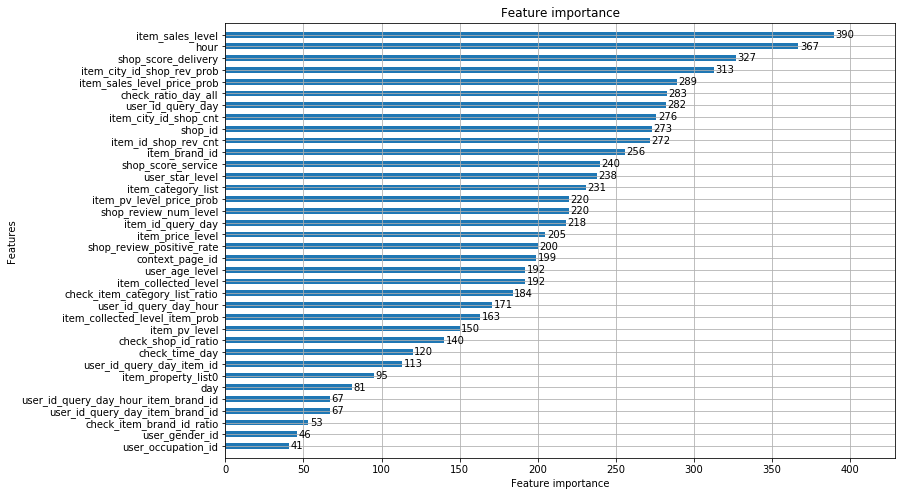

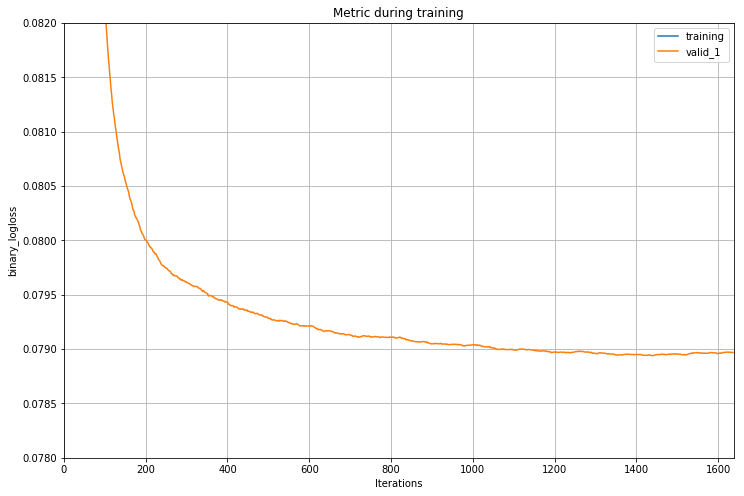

In [150]:
label = 'is_trade'
start_features = ['item_category_list', 
                  'item_price_level', 
                  'item_sales_level', 
                  'item_collected_level', 
                  'item_pv_level', 
                  'user_gender_id', 
                  'user_age_level', 
                  'user_occupation_id', 
                  'user_star_level', 
                  'context_page_id', 
                  'shop_review_num_level', 
                  'shop_review_positive_rate', 
                  'shop_score_service', 
                  'shop_score_delivery', 
                  'hour', 
                  'day', 
                  'user_id_query_day_hour', 
                  'shop_id', 
                  'item_id_query_day', 
                  'user_id_query_day_item_brand_id', 
                  'user_id_query_day_hour_item_brand_id', 
                  'user_id_query_day',
                  'item_brand_id',
                  'user_id_query_day_item_id', 
                  'check_item_brand_id_ratio',
                  'check_shop_id_ratio', 
                  'check_item_category_list_ratio', 
                  'check_ratio_day_all', 
                  'check_time_day', 
                  'item_city_id_shop_cnt', 
                  'item_city_id_shop_rev_prob', 
                  'item_id_shop_rev_cnt', 
                  'item_property_list0', 
                  'item_pv_level_price_prob', 
                  'item_collected_level_item_prob',
                  'item_sales_level_price_prob',
                  #'hour_map'
                 ]
print(len(start_features))
clf = lgbm.LGBMClassifier(random_state=1, num_leaves = 6,
                          n_estimators=5000,max_depth=3,learning_rate = 0.05, 
                          n_jobs=30)

clf = run(start_features, label, df2, clf, True)
lgbm.plot_importance(clf,figsize=(12,8),height=0.5)
plt.show()
lgbm.plot_metric(clf,figsize=(12,8),ylim=(0.078,0.082))
plt.show()

In [153]:
set(df2.columns) - set(df.columns)

{'check_context_page_id_ratio_hour_map',
 'check_context_page_id_time_day_hour_map',
 'check_item_brand_id_ratio_hour_map',
 'check_item_brand_id_time_day_hour_map',
 'check_item_category_list_ratio_hour_map',
 'check_item_category_list_time_day_hour_map',
 'check_item_collected_level_ratio_hour_map',
 'check_item_collected_level_time_day_hour_map',
 'check_item_id_ratio_hour_map',
 'check_item_id_time_day_hour_map',
 'check_item_price_level_ratio_hour_map',
 'check_item_price_level_time_day_hour_map',
 'check_item_pv_level_ratio_hour_map',
 'check_item_pv_level_time_day_hour_map',
 'check_item_sales_level_ratio_hour_map',
 'check_item_sales_level_time_day_hour_map',
 'check_ratio_day_hour_map_all',
 'check_shop_id_ratio_hour_map',
 'check_shop_id_time_day_hour_map',
 'check_time_day_hour_map',
 'hour_series',
 'item_brand_id_cnt1d',
 'item_brand_id_cnt1h',
 'item_brand_id_cntxd',
 'item_brand_id_cntxh',
 'item_brand_id_query_day_hour_map',
 'item_brand_id_query_min_map',
 'item_catego

In [194]:
label = 'is_trade'
start_features = ['item_category_list', 
                  'item_price_level', 
                  'item_sales_level', 
                  'item_collected_level', 
                  'user_gender_id', 
                  'user_age_level', 
                  'user_occupation_id', 
                  'user_star_level', 
                  'context_page_id', 
                  'shop_review_num_level', 
                  'shop_review_positive_rate', 
                  'shop_score_service', 
                  'hour', 
                  'day', 
                  'user_id_query_day_hour', 
                  'shop_id', 
                  'user_id_query_day_item_brand_id', 
                  'user_id_query_day_hour_item_brand_id', 
                  'user_id_query_day',
                  'user_id_query_day_item_id', 
                  'check_item_brand_id_ratio',
                  'check_shop_id_ratio', 
                  'check_item_category_list_ratio', 
                  'check_ratio_day_all', 
                  'check_time_day', 
                  'item_city_id_shop_cnt', 
                  'item_city_id_shop_rev_prob', 
                  'item_id_shop_rev_cnt', 
                  'item_property_list0', 
                  'item_pv_level_price_prob', 
                  'item_collected_level_item_prob',
                  'item_sales_level_price_prob',
                  'item_city_id_cnt1d',
                  'item_collected_level_user_age_cnt',
                 ]
print(len(start_features))
for i in start_features[:]: #list(set(df2.columns) - set(df.columns)):
    clf = lgbm.LGBMClassifier(random_state=1, num_leaves = 6,
                          n_estimators=20000,max_depth=3,learning_rate = 0.05, 
                          n_jobs=30)
    print(i)
    x = start_features[:]
    x.remove(i)
    clf = run(x, label, df2, clf, False)

34
item_category_list
0.07897694576081914
item_price_level
0.07881237696853904
item_sales_level
0.07926779190809718
item_collected_level
0.07870309555145186
user_gender_id
0.07885951747469662
user_age_level
0.07883918938554887
user_occupation_id
0.0786957304170187
user_star_level
0.07883197689798484
context_page_id
0.0788491594132728
shop_review_num_level
0.07868922293899037
shop_review_positive_rate
0.07872629824000457
shop_score_service
0.07890666305366725
hour
0.0790805721464056
day
0.07872450502557643
user_id_query_day_hour
0.07878725431083271
shop_id
0.07875021689742986
user_id_query_day_item_brand_id
0.07874793512011298
user_id_query_day_hour_item_brand_id
0.07871572054613299
user_id_query_day
0.07893695827753043
user_id_query_day_item_id
0.07892253587153111
check_item_brand_id_ratio
0.07872721109219002
check_shop_id_ratio
0.07875439358420648
check_item_category_list_ratio
0.07875637994057735
check_ratio_day_all
0.07887851547486452
check_time_day
0.07877981388561418
item_city_id_

KeyboardInterrupt: 

[1]	training's binary_logloss: 0.648025	valid_1's binary_logloss: 0.647791
Training until validation scores don't improve for 200 rounds.
[2]	training's binary_logloss: 0.607201	valid_1's binary_logloss: 0.606753
[3]	training's binary_logloss: 0.570105	valid_1's binary_logloss: 0.569448
[4]	training's binary_logloss: 0.536266	valid_1's binary_logloss: 0.535405
[5]	training's binary_logloss: 0.505299	valid_1's binary_logloss: 0.504246
[6]	training's binary_logloss: 0.476876	valid_1's binary_logloss: 0.475636
[7]	training's binary_logloss: 0.45072	valid_1's binary_logloss: 0.449296
[8]	training's binary_logloss: 0.426599	valid_1's binary_logloss: 0.425005
[9]	training's binary_logloss: 0.404308	valid_1's binary_logloss: 0.402548
[10]	training's binary_logloss: 0.383672	valid_1's binary_logloss: 0.381754
[11]	training's binary_logloss: 0.364536	valid_1's binary_logloss: 0.362466
[12]	training's binary_logloss: 0.346768	valid_1's binary_logloss: 0.344548
[13]	training's binary_logloss: 0.3

[107]	training's binary_logloss: 0.0896702	valid_1's binary_logloss: 0.0817775
[108]	training's binary_logloss: 0.0896225	valid_1's binary_logloss: 0.0817298
[109]	training's binary_logloss: 0.0895656	valid_1's binary_logloss: 0.0816711
[110]	training's binary_logloss: 0.0895117	valid_1's binary_logloss: 0.0816187
[111]	training's binary_logloss: 0.0894655	valid_1's binary_logloss: 0.0815674
[112]	training's binary_logloss: 0.0894281	valid_1's binary_logloss: 0.0815378
[113]	training's binary_logloss: 0.0893803	valid_1's binary_logloss: 0.0814892
[114]	training's binary_logloss: 0.0893413	valid_1's binary_logloss: 0.0814447
[115]	training's binary_logloss: 0.0893036	valid_1's binary_logloss: 0.0813952
[116]	training's binary_logloss: 0.0892588	valid_1's binary_logloss: 0.0813466
[117]	training's binary_logloss: 0.089224	valid_1's binary_logloss: 0.0813103
[118]	training's binary_logloss: 0.0891918	valid_1's binary_logloss: 0.0812792
[119]	training's binary_logloss: 0.0891587	valid_1's 

[211]	training's binary_logloss: 0.0874141	valid_1's binary_logloss: 0.0799186
[212]	training's binary_logloss: 0.0874056	valid_1's binary_logloss: 0.0799098
[213]	training's binary_logloss: 0.0873975	valid_1's binary_logloss: 0.0799043
[214]	training's binary_logloss: 0.0873872	valid_1's binary_logloss: 0.0798988
[215]	training's binary_logloss: 0.0873756	valid_1's binary_logloss: 0.0798918
[216]	training's binary_logloss: 0.0873677	valid_1's binary_logloss: 0.0798832
[217]	training's binary_logloss: 0.0873576	valid_1's binary_logloss: 0.0798779
[218]	training's binary_logloss: 0.0873428	valid_1's binary_logloss: 0.0798686
[219]	training's binary_logloss: 0.0873342	valid_1's binary_logloss: 0.079866
[220]	training's binary_logloss: 0.0873267	valid_1's binary_logloss: 0.0798669
[221]	training's binary_logloss: 0.0873177	valid_1's binary_logloss: 0.0798609
[222]	training's binary_logloss: 0.0873086	valid_1's binary_logloss: 0.0798611
[223]	training's binary_logloss: 0.0872973	valid_1's 

[315]	training's binary_logloss: 0.0866319	valid_1's binary_logloss: 0.0795228
[316]	training's binary_logloss: 0.0866264	valid_1's binary_logloss: 0.0795196
[317]	training's binary_logloss: 0.0866216	valid_1's binary_logloss: 0.0795202
[318]	training's binary_logloss: 0.0866151	valid_1's binary_logloss: 0.079511
[319]	training's binary_logloss: 0.0866081	valid_1's binary_logloss: 0.0795081
[320]	training's binary_logloss: 0.0866009	valid_1's binary_logloss: 0.0795074
[321]	training's binary_logloss: 0.086597	valid_1's binary_logloss: 0.0795033
[322]	training's binary_logloss: 0.0865904	valid_1's binary_logloss: 0.0794971
[323]	training's binary_logloss: 0.0865855	valid_1's binary_logloss: 0.0794971
[324]	training's binary_logloss: 0.086581	valid_1's binary_logloss: 0.0794946
[325]	training's binary_logloss: 0.0865767	valid_1's binary_logloss: 0.0794918
[326]	training's binary_logloss: 0.086571	valid_1's binary_logloss: 0.0794904
[327]	training's binary_logloss: 0.0865639	valid_1's bin

[420]	training's binary_logloss: 0.0861336	valid_1's binary_logloss: 0.0793179
[421]	training's binary_logloss: 0.0861287	valid_1's binary_logloss: 0.0793122
[422]	training's binary_logloss: 0.0861237	valid_1's binary_logloss: 0.0793107
[423]	training's binary_logloss: 0.08612	valid_1's binary_logloss: 0.0793119
[424]	training's binary_logloss: 0.0861169	valid_1's binary_logloss: 0.0793075
[425]	training's binary_logloss: 0.0861136	valid_1's binary_logloss: 0.0793078
[426]	training's binary_logloss: 0.0861107	valid_1's binary_logloss: 0.0793087
[427]	training's binary_logloss: 0.086105	valid_1's binary_logloss: 0.0793065
[428]	training's binary_logloss: 0.0860997	valid_1's binary_logloss: 0.0793069
[429]	training's binary_logloss: 0.0860958	valid_1's binary_logloss: 0.0793068
[430]	training's binary_logloss: 0.0860908	valid_1's binary_logloss: 0.0793048
[431]	training's binary_logloss: 0.0860866	valid_1's binary_logloss: 0.0793049
[432]	training's binary_logloss: 0.0860821	valid_1's bi

[525]	training's binary_logloss: 0.0857298	valid_1's binary_logloss: 0.0791629
[526]	training's binary_logloss: 0.0857265	valid_1's binary_logloss: 0.0791618
[527]	training's binary_logloss: 0.085723	valid_1's binary_logloss: 0.0791538
[528]	training's binary_logloss: 0.0857192	valid_1's binary_logloss: 0.0791534
[529]	training's binary_logloss: 0.0857157	valid_1's binary_logloss: 0.0791504
[530]	training's binary_logloss: 0.085712	valid_1's binary_logloss: 0.0791481
[531]	training's binary_logloss: 0.0857081	valid_1's binary_logloss: 0.0791475
[532]	training's binary_logloss: 0.0857053	valid_1's binary_logloss: 0.0791467
[533]	training's binary_logloss: 0.0857031	valid_1's binary_logloss: 0.079145
[534]	training's binary_logloss: 0.0856988	valid_1's binary_logloss: 0.0791444
[535]	training's binary_logloss: 0.0856943	valid_1's binary_logloss: 0.0791452
[536]	training's binary_logloss: 0.0856897	valid_1's binary_logloss: 0.0791422
[537]	training's binary_logloss: 0.0856872	valid_1's bi

[630]	training's binary_logloss: 0.0853873	valid_1's binary_logloss: 0.0790455
[631]	training's binary_logloss: 0.0853851	valid_1's binary_logloss: 0.0790455
[632]	training's binary_logloss: 0.0853823	valid_1's binary_logloss: 0.0790436
[633]	training's binary_logloss: 0.0853794	valid_1's binary_logloss: 0.0790436
[634]	training's binary_logloss: 0.0853767	valid_1's binary_logloss: 0.0790404
[635]	training's binary_logloss: 0.0853738	valid_1's binary_logloss: 0.0790387
[636]	training's binary_logloss: 0.0853719	valid_1's binary_logloss: 0.0790375
[637]	training's binary_logloss: 0.08537	valid_1's binary_logloss: 0.0790388
[638]	training's binary_logloss: 0.0853672	valid_1's binary_logloss: 0.0790382
[639]	training's binary_logloss: 0.0853648	valid_1's binary_logloss: 0.0790366
[640]	training's binary_logloss: 0.0853621	valid_1's binary_logloss: 0.0790354
[641]	training's binary_logloss: 0.0853594	valid_1's binary_logloss: 0.0790325
[642]	training's binary_logloss: 0.0853555	valid_1's b

[734]	training's binary_logloss: 0.0851144	valid_1's binary_logloss: 0.0789793
[735]	training's binary_logloss: 0.0851109	valid_1's binary_logloss: 0.0789739
[736]	training's binary_logloss: 0.0851093	valid_1's binary_logloss: 0.0789749
[737]	training's binary_logloss: 0.0851053	valid_1's binary_logloss: 0.0789779
[738]	training's binary_logloss: 0.0851015	valid_1's binary_logloss: 0.0789803
[739]	training's binary_logloss: 0.0850983	valid_1's binary_logloss: 0.0789787
[740]	training's binary_logloss: 0.0850946	valid_1's binary_logloss: 0.0789782
[741]	training's binary_logloss: 0.0850928	valid_1's binary_logloss: 0.0789768
[742]	training's binary_logloss: 0.0850912	valid_1's binary_logloss: 0.0789745
[743]	training's binary_logloss: 0.0850903	valid_1's binary_logloss: 0.0789742
[744]	training's binary_logloss: 0.0850875	valid_1's binary_logloss: 0.0789766
[745]	training's binary_logloss: 0.0850846	valid_1's binary_logloss: 0.0789766
[746]	training's binary_logloss: 0.0850814	valid_1's

[839]	training's binary_logloss: 0.0848486	valid_1's binary_logloss: 0.0789334
[840]	training's binary_logloss: 0.0848472	valid_1's binary_logloss: 0.0789345
[841]	training's binary_logloss: 0.0848447	valid_1's binary_logloss: 0.0789356
[842]	training's binary_logloss: 0.0848419	valid_1's binary_logloss: 0.0789352
[843]	training's binary_logloss: 0.0848399	valid_1's binary_logloss: 0.0789338
[844]	training's binary_logloss: 0.0848386	valid_1's binary_logloss: 0.0789324
[845]	training's binary_logloss: 0.0848369	valid_1's binary_logloss: 0.0789327
[846]	training's binary_logloss: 0.084836	valid_1's binary_logloss: 0.0789326
[847]	training's binary_logloss: 0.0848332	valid_1's binary_logloss: 0.0789323
[848]	training's binary_logloss: 0.0848313	valid_1's binary_logloss: 0.0789329
[849]	training's binary_logloss: 0.0848273	valid_1's binary_logloss: 0.0789306
[850]	training's binary_logloss: 0.0848269	valid_1's binary_logloss: 0.0789298
[851]	training's binary_logloss: 0.0848242	valid_1's 

[945]	training's binary_logloss: 0.08459	valid_1's binary_logloss: 0.0788728
[946]	training's binary_logloss: 0.0845886	valid_1's binary_logloss: 0.078873
[947]	training's binary_logloss: 0.0845852	valid_1's binary_logloss: 0.0788726
[948]	training's binary_logloss: 0.0845817	valid_1's binary_logloss: 0.0788736
[949]	training's binary_logloss: 0.0845813	valid_1's binary_logloss: 0.0788736
[950]	training's binary_logloss: 0.0845802	valid_1's binary_logloss: 0.0788736
[951]	training's binary_logloss: 0.0845789	valid_1's binary_logloss: 0.0788741
[952]	training's binary_logloss: 0.0845767	valid_1's binary_logloss: 0.0788722
[953]	training's binary_logloss: 0.0845742	valid_1's binary_logloss: 0.0788743
[954]	training's binary_logloss: 0.0845719	valid_1's binary_logloss: 0.0788742
[955]	training's binary_logloss: 0.0845696	valid_1's binary_logloss: 0.078874
[956]	training's binary_logloss: 0.0845683	valid_1's binary_logloss: 0.0788751
[957]	training's binary_logloss: 0.084566	valid_1's bina

[1049]	training's binary_logloss: 0.0843535	valid_1's binary_logloss: 0.0788552
[1050]	training's binary_logloss: 0.0843525	valid_1's binary_logloss: 0.0788559
[1051]	training's binary_logloss: 0.0843514	valid_1's binary_logloss: 0.0788566
[1052]	training's binary_logloss: 0.0843491	valid_1's binary_logloss: 0.078855
[1053]	training's binary_logloss: 0.0843464	valid_1's binary_logloss: 0.0788519
[1054]	training's binary_logloss: 0.0843445	valid_1's binary_logloss: 0.0788526
[1055]	training's binary_logloss: 0.0843433	valid_1's binary_logloss: 0.0788541
[1056]	training's binary_logloss: 0.0843403	valid_1's binary_logloss: 0.0788559
[1057]	training's binary_logloss: 0.0843374	valid_1's binary_logloss: 0.0788554
[1058]	training's binary_logloss: 0.0843342	valid_1's binary_logloss: 0.0788522
[1059]	training's binary_logloss: 0.084332	valid_1's binary_logloss: 0.0788517
[1060]	training's binary_logloss: 0.0843289	valid_1's binary_logloss: 0.0788511
[1061]	training's binary_logloss: 0.084326

[1152]	training's binary_logloss: 0.0841259	valid_1's binary_logloss: 0.0788246
[1153]	training's binary_logloss: 0.0841241	valid_1's binary_logloss: 0.0788249
[1154]	training's binary_logloss: 0.0841236	valid_1's binary_logloss: 0.0788242
[1155]	training's binary_logloss: 0.0841219	valid_1's binary_logloss: 0.0788241
[1156]	training's binary_logloss: 0.0841203	valid_1's binary_logloss: 0.0788237
[1157]	training's binary_logloss: 0.0841183	valid_1's binary_logloss: 0.0788221
[1158]	training's binary_logloss: 0.084116	valid_1's binary_logloss: 0.0788216
[1159]	training's binary_logloss: 0.0841132	valid_1's binary_logloss: 0.0788231
[1160]	training's binary_logloss: 0.0841107	valid_1's binary_logloss: 0.0788251
[1161]	training's binary_logloss: 0.0841068	valid_1's binary_logloss: 0.0788245
[1162]	training's binary_logloss: 0.0841046	valid_1's binary_logloss: 0.0788243
[1163]	training's binary_logloss: 0.0841023	valid_1's binary_logloss: 0.078822
[1164]	training's binary_logloss: 0.084099

[1256]	training's binary_logloss: 0.0838952	valid_1's binary_logloss: 0.0788121
[1257]	training's binary_logloss: 0.0838934	valid_1's binary_logloss: 0.0788138
[1258]	training's binary_logloss: 0.083891	valid_1's binary_logloss: 0.0788143
[1259]	training's binary_logloss: 0.0838891	valid_1's binary_logloss: 0.0788123
[1260]	training's binary_logloss: 0.0838887	valid_1's binary_logloss: 0.0788118
[1261]	training's binary_logloss: 0.083888	valid_1's binary_logloss: 0.0788125
[1262]	training's binary_logloss: 0.0838856	valid_1's binary_logloss: 0.0788125
[1263]	training's binary_logloss: 0.0838838	valid_1's binary_logloss: 0.07881
[1264]	training's binary_logloss: 0.0838815	valid_1's binary_logloss: 0.0788111
[1265]	training's binary_logloss: 0.0838801	valid_1's binary_logloss: 0.0788119
[1266]	training's binary_logloss: 0.0838781	valid_1's binary_logloss: 0.078813
[1267]	training's binary_logloss: 0.0838765	valid_1's binary_logloss: 0.0788126
[1268]	training's binary_logloss: 0.0838747	v

[1359]	training's binary_logloss: 0.0836939	valid_1's binary_logloss: 0.0787918
[1360]	training's binary_logloss: 0.0836906	valid_1's binary_logloss: 0.0787927
[1361]	training's binary_logloss: 0.0836894	valid_1's binary_logloss: 0.0787915
[1362]	training's binary_logloss: 0.0836872	valid_1's binary_logloss: 0.0787918
[1363]	training's binary_logloss: 0.0836859	valid_1's binary_logloss: 0.0787924
[1364]	training's binary_logloss: 0.0836836	valid_1's binary_logloss: 0.0787947
[1365]	training's binary_logloss: 0.0836816	valid_1's binary_logloss: 0.0787941
[1366]	training's binary_logloss: 0.0836793	valid_1's binary_logloss: 0.0787969
[1367]	training's binary_logloss: 0.0836778	valid_1's binary_logloss: 0.0787949
[1368]	training's binary_logloss: 0.0836761	valid_1's binary_logloss: 0.0787956
[1369]	training's binary_logloss: 0.0836726	valid_1's binary_logloss: 0.0787941
[1370]	training's binary_logloss: 0.0836709	valid_1's binary_logloss: 0.0787936
[1371]	training's binary_logloss: 0.0836

[1463]	training's binary_logloss: 0.0834881	valid_1's binary_logloss: 0.0787648
[1464]	training's binary_logloss: 0.0834862	valid_1's binary_logloss: 0.0787647
[1465]	training's binary_logloss: 0.0834846	valid_1's binary_logloss: 0.0787635
[1466]	training's binary_logloss: 0.0834824	valid_1's binary_logloss: 0.0787649
[1467]	training's binary_logloss: 0.0834806	valid_1's binary_logloss: 0.0787663
[1468]	training's binary_logloss: 0.0834771	valid_1's binary_logloss: 0.0787673
[1469]	training's binary_logloss: 0.083475	valid_1's binary_logloss: 0.078766
[1470]	training's binary_logloss: 0.0834725	valid_1's binary_logloss: 0.0787666
[1471]	training's binary_logloss: 0.08347	valid_1's binary_logloss: 0.0787682
[1472]	training's binary_logloss: 0.0834685	valid_1's binary_logloss: 0.0787665
[1473]	training's binary_logloss: 0.0834661	valid_1's binary_logloss: 0.0787649
[1474]	training's binary_logloss: 0.0834651	valid_1's binary_logloss: 0.0787644
[1475]	training's binary_logloss: 0.0834628	

[1566]	training's binary_logloss: 0.0832995	valid_1's binary_logloss: 0.078773
[1567]	training's binary_logloss: 0.0832977	valid_1's binary_logloss: 0.0787743
[1568]	training's binary_logloss: 0.0832966	valid_1's binary_logloss: 0.0787759
[1569]	training's binary_logloss: 0.0832945	valid_1's binary_logloss: 0.0787763
[1570]	training's binary_logloss: 0.0832933	valid_1's binary_logloss: 0.078778
[1571]	training's binary_logloss: 0.0832922	valid_1's binary_logloss: 0.0787784
[1572]	training's binary_logloss: 0.0832908	valid_1's binary_logloss: 0.0787784
[1573]	training's binary_logloss: 0.0832891	valid_1's binary_logloss: 0.078778
[1574]	training's binary_logloss: 0.0832845	valid_1's binary_logloss: 0.0787792
[1575]	training's binary_logloss: 0.0832822	valid_1's binary_logloss: 0.0787814
[1576]	training's binary_logloss: 0.0832808	valid_1's binary_logloss: 0.0787821
[1577]	training's binary_logloss: 0.0832784	valid_1's binary_logloss: 0.0787803
[1578]	training's binary_logloss: 0.0832768

[1671]	training's binary_logloss: 0.0831097	valid_1's binary_logloss: 0.0787854
[1672]	training's binary_logloss: 0.0831071	valid_1's binary_logloss: 0.0787863
[1673]	training's binary_logloss: 0.0831051	valid_1's binary_logloss: 0.0787836
[1674]	training's binary_logloss: 0.083103	valid_1's binary_logloss: 0.0787846
[1675]	training's binary_logloss: 0.0831004	valid_1's binary_logloss: 0.0787857
[1676]	training's binary_logloss: 0.0830981	valid_1's binary_logloss: 0.0787855
[1677]	training's binary_logloss: 0.0830959	valid_1's binary_logloss: 0.0787887
[1678]	training's binary_logloss: 0.0830937	valid_1's binary_logloss: 0.0787863
[1679]	training's binary_logloss: 0.0830917	valid_1's binary_logloss: 0.0787834
[1680]	training's binary_logloss: 0.0830897	valid_1's binary_logloss: 0.0787808
[1681]	training's binary_logloss: 0.083088	valid_1's binary_logloss: 0.078781
[1682]	training's binary_logloss: 0.0830862	valid_1's binary_logloss: 0.0787789
[1683]	training's binary_logloss: 0.0830856

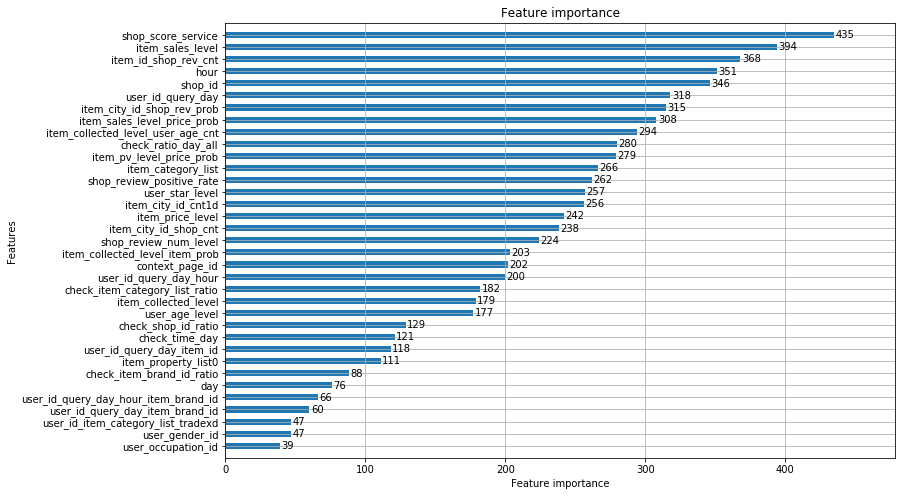

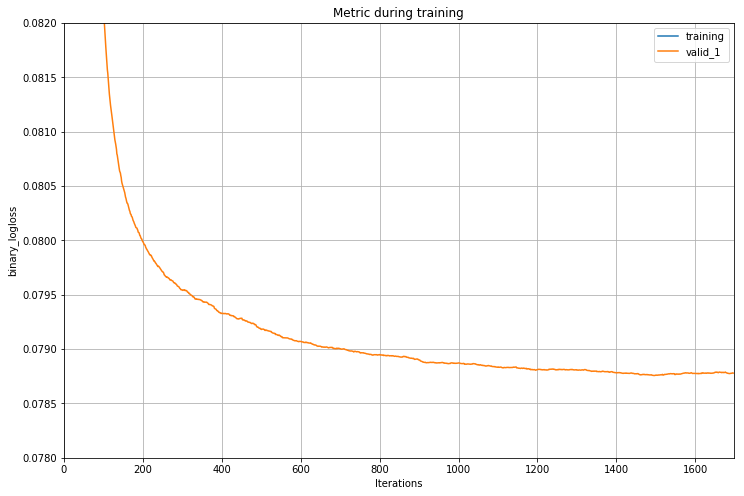

In [238]:
label = 'is_trade'
start_features = ['item_category_list', 
                  'item_price_level', 
                  'item_sales_level', 
                  'item_collected_level', 
                  'user_gender_id', 
                  'user_age_level', 
                  'user_occupation_id', 
                  'user_star_level', 
                  'context_page_id', 
                  'shop_review_num_level', 
                  'shop_review_positive_rate', 
                  'shop_score_service', 
                  'hour', 
                  'day', 
                  'user_id_query_day_hour', 
                  'shop_id', 
                  'user_id_query_day_item_brand_id', 
                  'user_id_query_day_hour_item_brand_id', 
                  'user_id_query_day',
                  'user_id_query_day_item_id', 
                  'check_item_brand_id_ratio',
                  'check_shop_id_ratio', 
                  'check_item_category_list_ratio', 
                  'check_ratio_day_all', 
                  'check_time_day', 
                  'item_city_id_shop_cnt', 
                  'item_city_id_shop_rev_prob', 
                  'item_id_shop_rev_cnt', 
                  'item_property_list0', 
                  'item_pv_level_price_prob', 
                  'item_collected_level_item_prob',
                  'item_sales_level_price_prob',
                  'item_city_id_cnt1d',
                  'item_collected_level_user_age_cnt',
                  'user_id_item_category_list_tradexd',
                 ]
clf = lgbm.LGBMClassifier(random_state=1, num_leaves = 6,
                          n_estimators=20000,max_depth=3,learning_rate = 0.05, 
                          n_jobs=30)
clf = run(start_features, label, df2, clf, True)
lgbm.plot_importance(clf,figsize=(12,8),height=0.5)
plt.show()
lgbm.plot_metric(clf,figsize=(12,8),ylim=(0.078,0.082))
plt.show()

In [174]:
t1 = ['item_category_list', 'item_price_level', 'item_sales_level', 'item_collected_level', 'item_pv_level', 'user_gender_id', 'user_age_level', 'user_occupation_id', 'user_star_level', 'context_page_id', 'shop_review_num_level', 'shop_review_positive_rate', 'shop_score_service', 'shop_score_delivery', 'hour', 'day', 'user_id_query_day_hour', 'shop_id', 'item_id_query_day', 'user_id_query_day_item_brand_id', 'user_id_query_day_hour_item_brand_id', 'user_id_query_day', 'item_brand_id', 'user_id_query_day_item_id', 'check_item_brand_id_ratio', 'check_shop_id_ratio', 'check_item_category_list_ratio', 'check_ratio_day_all', 'check_time_day', 'item_city_id_shop_cnt', 'item_city_id_shop_rev_prob', 'item_id_shop_rev_cnt', 'item_property_list0', 'item_pv_level_price_prob', 'item_collected_level_item_prob', 'item_sales_level_price_prob']
t2 = ['item_category_list', 
                  'item_price_level', 
                  'item_sales_level', 
                  'item_collected_level', 
                  #'item_pv_level', 
                  'user_gender_id', 
                  'user_age_level', 
                  'user_occupation_id', 
                  'user_star_level', 
                  'context_page_id', 
                  'shop_review_num_level', 
                  'shop_review_positive_rate', 
                  'shop_score_service', 
                  #'shop_score_delivery', 
                  'hour', 
                  'day', 
                  'user_id_query_day_hour', 
                  'shop_id', 
                  #'item_id_query_day', 
                  'user_id_query_day_item_brand_id', 
                  'user_id_query_day_hour_item_brand_id', 
                  'user_id_query_day',
                  #'item_brand_id',
                  'user_id_query_day_item_id', 
                  'check_item_brand_id_ratio',
                  'check_shop_id_ratio', 
                  'check_item_category_list_ratio', 
                  'check_ratio_day_all', 
                  'check_time_day', 
                  'item_city_id_shop_cnt', 
                  'item_city_id_shop_rev_prob', 
                  'item_id_shop_rev_cnt', 
                  'item_property_list0', 
                  'item_pv_level_price_prob', 
                  'item_collected_level_item_prob',
                  'item_sales_level_price_prob',
                  'item_city_id_cnt1d',
                 ]

In [175]:
set(t1) - set(t2)

{'item_brand_id', 'item_id_query_day', 'item_pv_level', 'shop_score_delivery'}

In [176]:
set(t2) - set(t1)

{'item_city_id_cnt1d'}

In [ ]:
label = 'is_trade'
start_features =['item_category_list', 'item_price_level', 'item_sales_level', 'item_collected_level', 'user_gender_id', 'user_age_level', 'user_star_level', 'context_page_id', 'shop_review_positive_rate', 'shop_score_service', 'hour', 'day', 'user_id_query_day_hour', 'shop_id', 'user_id_query_day_item_brand_id', 'user_id_query_day_hour_item_brand_id', 'user_id_query_day', 'user_id_query_day_item_id', 'check_item_brand_id_ratio', 'check_shop_id_ratio', 'check_item_category_list_ratio', 'check_ratio_day_all', 'item_city_id_shop_cnt', 'item_city_id_shop_rev_prob', 'item_id_shop_rev_cnt', 'item_property_list0', 'item_pv_level_price_prob', 'item_collected_level_item_prob', 'item_sales_level_price_prob', 'item_city_id_cnt1d', 'item_collected_level_user_age_cnt', 'item_price_level_item_cnt', 'item_price_level_item_prob', 'user_id_shop_id_trade_meanxd']
clf = lgbm.LGBMClassifier(random_state=1, num_leaves = 6,
                          n_estimators=20000,max_depth=3,learning_rate = 0.05, 
                          n_jobs=30)
for i in df2.columns[:]:
    if ('tradexd' in i):
        print(i)
        clf = run(start_features + [i], label, df2, clf, False)
        print(clf.best_iteration_)

user_id_tradexd
0.07865190118639814
1565
user_id_item_id_tradexd
0.07861534198258217
1824
user_id_item_category_list_tradexd
0.07856980049421584
1900
user_id_shop_id_tradexd
0.07855023383734931
2152
user_id_item_brand_id_tradexd
0.07863006188671774
1642
user_id_item_price_level_tradexd
0.0786666783330213
1689
user_id_item_sales_level_tradexd
0.07857016569264039
2237
user_id_item_pv_level_tradexd
0.07862443046939253
1731
user_id_shop_review_num_level_tradexd
0.07870083284576651
1787
user_id_item_city_id_tradexd
0.07858190401838026
2193
user_age_level_tradexd
0.07873216501278346
1462
user_age_level_item_id_tradexd


In [ ]:
label = 'is_trade'
start_features =['item_category_list', 'item_price_level', 'item_sales_level', 'item_collected_level', 'user_gender_id', 'user_age_level', 'user_star_level', 'context_page_id', 'shop_review_positive_rate', 'shop_score_service', 'hour', 'day', 'user_id_query_day_hour', 'shop_id', 'user_id_query_day_item_brand_id', 'user_id_query_day_hour_item_brand_id', 'user_id_query_day', 'user_id_query_day_item_id', 'check_item_brand_id_ratio', 'check_shop_id_ratio', 'check_item_category_list_ratio', 'check_ratio_day_all', 'item_city_id_shop_cnt', 'item_city_id_shop_rev_prob', 'item_id_shop_rev_cnt', 'item_property_list0', 'item_pv_level_price_prob', 'item_collected_level_item_prob', 'item_sales_level_price_prob', 'item_city_id_cnt1d', 'item_collected_level_user_age_cnt', 'item_price_level_item_cnt', 'item_price_level_item_prob', 'user_id_shop_id_trade_meanxd']
clf = lgbm.LGBMClassifier(random_state=1, num_leaves = 6,
                          n_estimators=20000,max_depth=3,learning_rate = 0.05, 
                          n_jobs=30)
#0.07855
for i in df2.columns[:]:
    if ('cnt' in i):
        t = i.split('_')
        t = t[:-1]
        print(i)
        t1 = '_'.join(t)+'_cnt'
        t2 = '_'.join(t)+'_prob'
        try:
            clf = run(start_features + [t1,t2], label, df2, clf, False)
            print(clf.best_iteration_)
        except KeyError:
            pass

[1]	training's binary_logloss: 0.648025	valid_1's binary_logloss: 0.647791
Training until validation scores don't improve for 200 rounds.
[2]	training's binary_logloss: 0.607201	valid_1's binary_logloss: 0.606753
[3]	training's binary_logloss: 0.570105	valid_1's binary_logloss: 0.569448
[4]	training's binary_logloss: 0.536266	valid_1's binary_logloss: 0.535405
[5]	training's binary_logloss: 0.505299	valid_1's binary_logloss: 0.504246
[6]	training's binary_logloss: 0.476876	valid_1's binary_logloss: 0.475636
[7]	training's binary_logloss: 0.45072	valid_1's binary_logloss: 0.449296
[8]	training's binary_logloss: 0.426599	valid_1's binary_logloss: 0.425005
[9]	training's binary_logloss: 0.404308	valid_1's binary_logloss: 0.402548
[10]	training's binary_logloss: 0.383672	valid_1's binary_logloss: 0.381754
[11]	training's binary_logloss: 0.364536	valid_1's binary_logloss: 0.362466
[12]	training's binary_logloss: 0.346768	valid_1's binary_logloss: 0.344548
[13]	training's binary_logloss: 0.3

[108]	training's binary_logloss: 0.0896225	valid_1's binary_logloss: 0.0817298
[109]	training's binary_logloss: 0.0895656	valid_1's binary_logloss: 0.0816711
[110]	training's binary_logloss: 0.0895117	valid_1's binary_logloss: 0.0816187
[111]	training's binary_logloss: 0.0894655	valid_1's binary_logloss: 0.0815674
[112]	training's binary_logloss: 0.0894281	valid_1's binary_logloss: 0.0815378
[113]	training's binary_logloss: 0.0893803	valid_1's binary_logloss: 0.0814892
[114]	training's binary_logloss: 0.0893384	valid_1's binary_logloss: 0.0814424
[115]	training's binary_logloss: 0.0893007	valid_1's binary_logloss: 0.0813929
[116]	training's binary_logloss: 0.0892559	valid_1's binary_logloss: 0.0813444
[117]	training's binary_logloss: 0.0892184	valid_1's binary_logloss: 0.081306
[118]	training's binary_logloss: 0.0891862	valid_1's binary_logloss: 0.081275
[119]	training's binary_logloss: 0.0891531	valid_1's binary_logloss: 0.0812368
[120]	training's binary_logloss: 0.0891168	valid_1's b

[214]	training's binary_logloss: 0.0873675	valid_1's binary_logloss: 0.079833
[215]	training's binary_logloss: 0.0873573	valid_1's binary_logloss: 0.0798321
[216]	training's binary_logloss: 0.0873493	valid_1's binary_logloss: 0.0798281
[217]	training's binary_logloss: 0.0873411	valid_1's binary_logloss: 0.0798276
[218]	training's binary_logloss: 0.0873313	valid_1's binary_logloss: 0.0798165
[219]	training's binary_logloss: 0.0873189	valid_1's binary_logloss: 0.0798078
[220]	training's binary_logloss: 0.0873091	valid_1's binary_logloss: 0.0798083
[221]	training's binary_logloss: 0.0873003	valid_1's binary_logloss: 0.0797985
[222]	training's binary_logloss: 0.0872898	valid_1's binary_logloss: 0.0797954
[223]	training's binary_logloss: 0.087279	valid_1's binary_logloss: 0.0797822
[224]	training's binary_logloss: 0.0872682	valid_1's binary_logloss: 0.0797719
[225]	training's binary_logloss: 0.0872599	valid_1's binary_logloss: 0.0797668
[226]	training's binary_logloss: 0.0872528	valid_1's b

[321]	training's binary_logloss: 0.0865849	valid_1's binary_logloss: 0.0794262
[322]	training's binary_logloss: 0.0865789	valid_1's binary_logloss: 0.0794248
[323]	training's binary_logloss: 0.0865727	valid_1's binary_logloss: 0.0794203
[324]	training's binary_logloss: 0.0865671	valid_1's binary_logloss: 0.079414
[325]	training's binary_logloss: 0.0865617	valid_1's binary_logloss: 0.0794095
[326]	training's binary_logloss: 0.0865571	valid_1's binary_logloss: 0.0794029
[327]	training's binary_logloss: 0.086552	valid_1's binary_logloss: 0.0794008
[328]	training's binary_logloss: 0.0865443	valid_1's binary_logloss: 0.0794035
[329]	training's binary_logloss: 0.0865389	valid_1's binary_logloss: 0.0794034
[330]	training's binary_logloss: 0.0865318	valid_1's binary_logloss: 0.0793984
[331]	training's binary_logloss: 0.0865272	valid_1's binary_logloss: 0.0793971
[332]	training's binary_logloss: 0.0865224	valid_1's binary_logloss: 0.0793931
[333]	training's binary_logloss: 0.0865159	valid_1's b

[427]	training's binary_logloss: 0.0860763	valid_1's binary_logloss: 0.0792438
[428]	training's binary_logloss: 0.086072	valid_1's binary_logloss: 0.0792441
[429]	training's binary_logloss: 0.0860674	valid_1's binary_logloss: 0.0792449
[430]	training's binary_logloss: 0.0860615	valid_1's binary_logloss: 0.0792178
[431]	training's binary_logloss: 0.0860579	valid_1's binary_logloss: 0.0792183
[432]	training's binary_logloss: 0.0860523	valid_1's binary_logloss: 0.0792176
[433]	training's binary_logloss: 0.0860493	valid_1's binary_logloss: 0.0792172
[434]	training's binary_logloss: 0.0860451	valid_1's binary_logloss: 0.0792148
[435]	training's binary_logloss: 0.0860404	valid_1's binary_logloss: 0.079211
[436]	training's binary_logloss: 0.086037	valid_1's binary_logloss: 0.079211
[437]	training's binary_logloss: 0.0860332	valid_1's binary_logloss: 0.079207
[438]	training's binary_logloss: 0.0860294	valid_1's binary_logloss: 0.0792071
[439]	training's binary_logloss: 0.0860256	valid_1's bina

[531]	training's binary_logloss: 0.085682	valid_1's binary_logloss: 0.0791001
[532]	training's binary_logloss: 0.0856795	valid_1's binary_logloss: 0.0791011
[533]	training's binary_logloss: 0.0856757	valid_1's binary_logloss: 0.0790996
[534]	training's binary_logloss: 0.0856719	valid_1's binary_logloss: 0.0790944
[535]	training's binary_logloss: 0.0856686	valid_1's binary_logloss: 0.0790932
[536]	training's binary_logloss: 0.0856665	valid_1's binary_logloss: 0.07909
[537]	training's binary_logloss: 0.0856629	valid_1's binary_logloss: 0.0790898
[538]	training's binary_logloss: 0.0856593	valid_1's binary_logloss: 0.0790905
[539]	training's binary_logloss: 0.0856559	valid_1's binary_logloss: 0.079092
[540]	training's binary_logloss: 0.0856522	valid_1's binary_logloss: 0.079088
[541]	training's binary_logloss: 0.0856485	valid_1's binary_logloss: 0.079087
[542]	training's binary_logloss: 0.085644	valid_1's binary_logloss: 0.0790867
[543]	training's binary_logloss: 0.0856405	valid_1's binary

[639]	training's binary_logloss: 0.0853255	valid_1's binary_logloss: 0.0789905
[640]	training's binary_logloss: 0.0853242	valid_1's binary_logloss: 0.0789899
[641]	training's binary_logloss: 0.0853205	valid_1's binary_logloss: 0.0789895
[642]	training's binary_logloss: 0.0853176	valid_1's binary_logloss: 0.0789856
[643]	training's binary_logloss: 0.0853136	valid_1's binary_logloss: 0.078986
[644]	training's binary_logloss: 0.0853114	valid_1's binary_logloss: 0.0789872
[645]	training's binary_logloss: 0.0853083	valid_1's binary_logloss: 0.0789854
[646]	training's binary_logloss: 0.0853051	valid_1's binary_logloss: 0.0789834
[647]	training's binary_logloss: 0.0853029	valid_1's binary_logloss: 0.0789824
[648]	training's binary_logloss: 0.0853003	valid_1's binary_logloss: 0.0789829
[649]	training's binary_logloss: 0.0852963	valid_1's binary_logloss: 0.0789796
[650]	training's binary_logloss: 0.0852922	valid_1's binary_logloss: 0.0789775
[651]	training's binary_logloss: 0.0852884	valid_1's 

[746]	training's binary_logloss: 0.0850217	valid_1's binary_logloss: 0.0789225
[747]	training's binary_logloss: 0.0850196	valid_1's binary_logloss: 0.0789235
[748]	training's binary_logloss: 0.0850162	valid_1's binary_logloss: 0.0789217
[749]	training's binary_logloss: 0.0850127	valid_1's binary_logloss: 0.0789219
[750]	training's binary_logloss: 0.0850117	valid_1's binary_logloss: 0.0789221
[751]	training's binary_logloss: 0.0850076	valid_1's binary_logloss: 0.0789209
[752]	training's binary_logloss: 0.0850063	valid_1's binary_logloss: 0.0789199
[753]	training's binary_logloss: 0.0850045	valid_1's binary_logloss: 0.0789174
[754]	training's binary_logloss: 0.0850012	valid_1's binary_logloss: 0.0789185
[755]	training's binary_logloss: 0.0849986	valid_1's binary_logloss: 0.0789179
[756]	training's binary_logloss: 0.0849951	valid_1's binary_logloss: 0.0789187
[757]	training's binary_logloss: 0.084992	valid_1's binary_logloss: 0.0789196
[758]	training's binary_logloss: 0.0849899	valid_1's 

[855]	training's binary_logloss: 0.0847398	valid_1's binary_logloss: 0.0788824
[856]	training's binary_logloss: 0.084737	valid_1's binary_logloss: 0.0788843
[857]	training's binary_logloss: 0.0847339	valid_1's binary_logloss: 0.0788797
[858]	training's binary_logloss: 0.0847313	valid_1's binary_logloss: 0.0788794
[859]	training's binary_logloss: 0.0847289	valid_1's binary_logloss: 0.0788791
[860]	training's binary_logloss: 0.0847275	valid_1's binary_logloss: 0.0788804
[861]	training's binary_logloss: 0.0847259	valid_1's binary_logloss: 0.0788796
[862]	training's binary_logloss: 0.0847249	valid_1's binary_logloss: 0.0788788
[863]	training's binary_logloss: 0.0847236	valid_1's binary_logloss: 0.0788764
[864]	training's binary_logloss: 0.0847202	valid_1's binary_logloss: 0.078875
[865]	training's binary_logloss: 0.0847178	valid_1's binary_logloss: 0.0788738
[866]	training's binary_logloss: 0.0847158	valid_1's binary_logloss: 0.0788733
[867]	training's binary_logloss: 0.0847138	valid_1's b

[963]	training's binary_logloss: 0.0844886	valid_1's binary_logloss: 0.0788196
[964]	training's binary_logloss: 0.0844876	valid_1's binary_logloss: 0.0788194
[965]	training's binary_logloss: 0.0844853	valid_1's binary_logloss: 0.0788194
[966]	training's binary_logloss: 0.0844836	valid_1's binary_logloss: 0.0788192
[967]	training's binary_logloss: 0.0844806	valid_1's binary_logloss: 0.0788186
[968]	training's binary_logloss: 0.0844765	valid_1's binary_logloss: 0.078819
[969]	training's binary_logloss: 0.0844743	valid_1's binary_logloss: 0.0788189
[970]	training's binary_logloss: 0.0844703	valid_1's binary_logloss: 0.0788185
[971]	training's binary_logloss: 0.0844684	valid_1's binary_logloss: 0.0788202
[972]	training's binary_logloss: 0.0844658	valid_1's binary_logloss: 0.078821
[973]	training's binary_logloss: 0.0844632	valid_1's binary_logloss: 0.0788217
[974]	training's binary_logloss: 0.084462	valid_1's binary_logloss: 0.078823
[975]	training's binary_logloss: 0.0844607	valid_1's bin

[1071]	training's binary_logloss: 0.0842409	valid_1's binary_logloss: 0.0787917
[1072]	training's binary_logloss: 0.0842387	valid_1's binary_logloss: 0.0787905
[1073]	training's binary_logloss: 0.0842376	valid_1's binary_logloss: 0.0787912
[1074]	training's binary_logloss: 0.0842353	valid_1's binary_logloss: 0.0787917
[1075]	training's binary_logloss: 0.084233	valid_1's binary_logloss: 0.0787905
[1076]	training's binary_logloss: 0.0842303	valid_1's binary_logloss: 0.0787937
[1077]	training's binary_logloss: 0.0842278	valid_1's binary_logloss: 0.0787938
[1078]	training's binary_logloss: 0.0842263	valid_1's binary_logloss: 0.0787937
[1079]	training's binary_logloss: 0.0842242	valid_1's binary_logloss: 0.0787948
[1080]	training's binary_logloss: 0.0842213	valid_1's binary_logloss: 0.0787961
[1081]	training's binary_logloss: 0.0842183	valid_1's binary_logloss: 0.0787965
[1082]	training's binary_logloss: 0.084216	valid_1's binary_logloss: 0.0787963
[1083]	training's binary_logloss: 0.084214

[1177]	training's binary_logloss: 0.0840061	valid_1's binary_logloss: 0.0787402
[1178]	training's binary_logloss: 0.084004	valid_1's binary_logloss: 0.0787391
[1179]	training's binary_logloss: 0.0840023	valid_1's binary_logloss: 0.0787363
[1180]	training's binary_logloss: 0.0840009	valid_1's binary_logloss: 0.0787366
[1181]	training's binary_logloss: 0.0839992	valid_1's binary_logloss: 0.0787362
[1182]	training's binary_logloss: 0.0839966	valid_1's binary_logloss: 0.0787353
[1183]	training's binary_logloss: 0.0839944	valid_1's binary_logloss: 0.0787365
[1184]	training's binary_logloss: 0.0839929	valid_1's binary_logloss: 0.0787362
[1185]	training's binary_logloss: 0.0839921	valid_1's binary_logloss: 0.078736
[1186]	training's binary_logloss: 0.0839916	valid_1's binary_logloss: 0.0787359
[1187]	training's binary_logloss: 0.0839907	valid_1's binary_logloss: 0.0787365
[1188]	training's binary_logloss: 0.0839884	valid_1's binary_logloss: 0.078736
[1189]	training's binary_logloss: 0.0839875

[1280]	training's binary_logloss: 0.0838031	valid_1's binary_logloss: 0.0787092
[1281]	training's binary_logloss: 0.0838014	valid_1's binary_logloss: 0.0787069
[1282]	training's binary_logloss: 0.0837998	valid_1's binary_logloss: 0.0787059
[1283]	training's binary_logloss: 0.0837987	valid_1's binary_logloss: 0.0787062
[1284]	training's binary_logloss: 0.0837977	valid_1's binary_logloss: 0.0787057
[1285]	training's binary_logloss: 0.0837971	valid_1's binary_logloss: 0.0787065
[1286]	training's binary_logloss: 0.0837948	valid_1's binary_logloss: 0.0787062
[1287]	training's binary_logloss: 0.0837934	valid_1's binary_logloss: 0.0787059
[1288]	training's binary_logloss: 0.0837914	valid_1's binary_logloss: 0.0787067
[1289]	training's binary_logloss: 0.0837898	valid_1's binary_logloss: 0.0787065
[1290]	training's binary_logloss: 0.0837885	valid_1's binary_logloss: 0.0787042
[1291]	training's binary_logloss: 0.083787	valid_1's binary_logloss: 0.0787024
[1292]	training's binary_logloss: 0.08378

[1386]	training's binary_logloss: 0.0835825	valid_1's binary_logloss: 0.0786927
[1387]	training's binary_logloss: 0.0835817	valid_1's binary_logloss: 0.0786911
[1388]	training's binary_logloss: 0.0835803	valid_1's binary_logloss: 0.0786899
[1389]	training's binary_logloss: 0.083577	valid_1's binary_logloss: 0.0786932
[1390]	training's binary_logloss: 0.0835748	valid_1's binary_logloss: 0.0786946
[1391]	training's binary_logloss: 0.0835745	valid_1's binary_logloss: 0.0786945
[1392]	training's binary_logloss: 0.0835737	valid_1's binary_logloss: 0.0786947
[1393]	training's binary_logloss: 0.0835719	valid_1's binary_logloss: 0.0786963
[1394]	training's binary_logloss: 0.0835693	valid_1's binary_logloss: 0.0786969
[1395]	training's binary_logloss: 0.0835674	valid_1's binary_logloss: 0.0786983
[1396]	training's binary_logloss: 0.0835654	valid_1's binary_logloss: 0.0786969
[1397]	training's binary_logloss: 0.0835621	valid_1's binary_logloss: 0.0786982
[1398]	training's binary_logloss: 0.08356

[1492]	training's binary_logloss: 0.0833827	valid_1's binary_logloss: 0.0786796
[1493]	training's binary_logloss: 0.0833803	valid_1's binary_logloss: 0.0786785
[1494]	training's binary_logloss: 0.0833769	valid_1's binary_logloss: 0.0786801
[1495]	training's binary_logloss: 0.0833749	valid_1's binary_logloss: 0.0786815
[1496]	training's binary_logloss: 0.083372	valid_1's binary_logloss: 0.0786815
[1497]	training's binary_logloss: 0.0833705	valid_1's binary_logloss: 0.0786831
[1498]	training's binary_logloss: 0.0833686	valid_1's binary_logloss: 0.0786842
[1499]	training's binary_logloss: 0.0833662	valid_1's binary_logloss: 0.0786847
[1500]	training's binary_logloss: 0.0833636	valid_1's binary_logloss: 0.0786852
[1501]	training's binary_logloss: 0.0833612	valid_1's binary_logloss: 0.0786861
[1502]	training's binary_logloss: 0.0833588	valid_1's binary_logloss: 0.0786851
[1503]	training's binary_logloss: 0.083356	valid_1's binary_logloss: 0.0786814
[1504]	training's binary_logloss: 0.083353

[1596]	training's binary_logloss: 0.083179	valid_1's binary_logloss: 0.0786735
[1597]	training's binary_logloss: 0.0831771	valid_1's binary_logloss: 0.0786735
[1598]	training's binary_logloss: 0.0831738	valid_1's binary_logloss: 0.0786732
[1599]	training's binary_logloss: 0.0831722	valid_1's binary_logloss: 0.0786726
[1600]	training's binary_logloss: 0.0831706	valid_1's binary_logloss: 0.0786732
[1601]	training's binary_logloss: 0.0831693	valid_1's binary_logloss: 0.0786734
[1602]	training's binary_logloss: 0.0831682	valid_1's binary_logloss: 0.0786731
[1603]	training's binary_logloss: 0.0831668	valid_1's binary_logloss: 0.0786701
[1604]	training's binary_logloss: 0.0831644	valid_1's binary_logloss: 0.0786727
[1605]	training's binary_logloss: 0.083162	valid_1's binary_logloss: 0.078671
[1606]	training's binary_logloss: 0.0831599	valid_1's binary_logloss: 0.0786714
[1607]	training's binary_logloss: 0.0831577	valid_1's binary_logloss: 0.078673
[1608]	training's binary_logloss: 0.0831559	

[1702]	training's binary_logloss: 0.0829865	valid_1's binary_logloss: 0.0786472
[1703]	training's binary_logloss: 0.0829854	valid_1's binary_logloss: 0.0786472
[1704]	training's binary_logloss: 0.0829828	valid_1's binary_logloss: 0.0786465
[1705]	training's binary_logloss: 0.0829807	valid_1's binary_logloss: 0.0786479
[1706]	training's binary_logloss: 0.0829778	valid_1's binary_logloss: 0.0786457
[1707]	training's binary_logloss: 0.0829755	valid_1's binary_logloss: 0.078648
[1708]	training's binary_logloss: 0.0829739	valid_1's binary_logloss: 0.0786476
[1709]	training's binary_logloss: 0.0829727	valid_1's binary_logloss: 0.078646
[1710]	training's binary_logloss: 0.0829707	valid_1's binary_logloss: 0.0786463
[1711]	training's binary_logloss: 0.0829706	valid_1's binary_logloss: 0.0786461
[1712]	training's binary_logloss: 0.0829688	valid_1's binary_logloss: 0.0786448
[1713]	training's binary_logloss: 0.0829671	valid_1's binary_logloss: 0.0786448
[1714]	training's binary_logloss: 0.082965

[1805]	training's binary_logloss: 0.0828046	valid_1's binary_logloss: 0.0786336
[1806]	training's binary_logloss: 0.0828026	valid_1's binary_logloss: 0.078633
[1807]	training's binary_logloss: 0.0828002	valid_1's binary_logloss: 0.0786313
[1808]	training's binary_logloss: 0.0827983	valid_1's binary_logloss: 0.0786325
[1809]	training's binary_logloss: 0.0827969	valid_1's binary_logloss: 0.0786323
[1810]	training's binary_logloss: 0.0827954	valid_1's binary_logloss: 0.0786313
[1811]	training's binary_logloss: 0.0827938	valid_1's binary_logloss: 0.0786305
[1812]	training's binary_logloss: 0.0827927	valid_1's binary_logloss: 0.0786317
[1813]	training's binary_logloss: 0.08279	valid_1's binary_logloss: 0.0786337
[1814]	training's binary_logloss: 0.0827882	valid_1's binary_logloss: 0.0786338
[1815]	training's binary_logloss: 0.0827856	valid_1's binary_logloss: 0.0786333
[1816]	training's binary_logloss: 0.0827843	valid_1's binary_logloss: 0.0786343
[1817]	training's binary_logloss: 0.0827821

[1909]	training's binary_logloss: 0.0826201	valid_1's binary_logloss: 0.0786427
[1910]	training's binary_logloss: 0.0826173	valid_1's binary_logloss: 0.0786437
[1911]	training's binary_logloss: 0.082616	valid_1's binary_logloss: 0.0786433
[1912]	training's binary_logloss: 0.0826134	valid_1's binary_logloss: 0.0786458
[1913]	training's binary_logloss: 0.0826109	valid_1's binary_logloss: 0.0786455
[1914]	training's binary_logloss: 0.0826096	valid_1's binary_logloss: 0.0786457
[1915]	training's binary_logloss: 0.0826088	valid_1's binary_logloss: 0.078645
[1916]	training's binary_logloss: 0.0826075	valid_1's binary_logloss: 0.0786436
[1917]	training's binary_logloss: 0.0826058	valid_1's binary_logloss: 0.0786429
[1918]	training's binary_logloss: 0.082604	valid_1's binary_logloss: 0.0786418
[1919]	training's binary_logloss: 0.0826031	valid_1's binary_logloss: 0.078642
[1920]	training's binary_logloss: 0.0826019	valid_1's binary_logloss: 0.078643
[1921]	training's binary_logloss: 0.0826001	v

[2014]	training's binary_logloss: 0.0824442	valid_1's binary_logloss: 0.0786433
[2015]	training's binary_logloss: 0.0824423	valid_1's binary_logloss: 0.078643
[2016]	training's binary_logloss: 0.0824417	valid_1's binary_logloss: 0.078645
[2017]	training's binary_logloss: 0.08244	valid_1's binary_logloss: 0.0786449
[2018]	training's binary_logloss: 0.0824374	valid_1's binary_logloss: 0.0786451
[2019]	training's binary_logloss: 0.0824359	valid_1's binary_logloss: 0.0786465
[2020]	training's binary_logloss: 0.0824344	valid_1's binary_logloss: 0.0786465
[2021]	training's binary_logloss: 0.0824328	valid_1's binary_logloss: 0.0786474
[2022]	training's binary_logloss: 0.0824322	valid_1's binary_logloss: 0.0786476
[2023]	training's binary_logloss: 0.0824308	valid_1's binary_logloss: 0.0786483
[2024]	training's binary_logloss: 0.0824304	valid_1's binary_logloss: 0.0786486
[2025]	training's binary_logloss: 0.0824292	valid_1's binary_logloss: 0.0786472
[2026]	training's binary_logloss: 0.0824291	

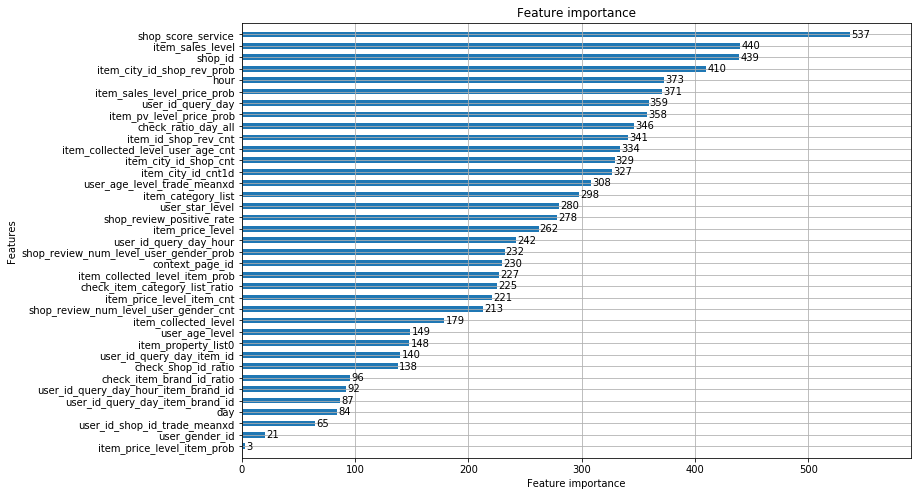

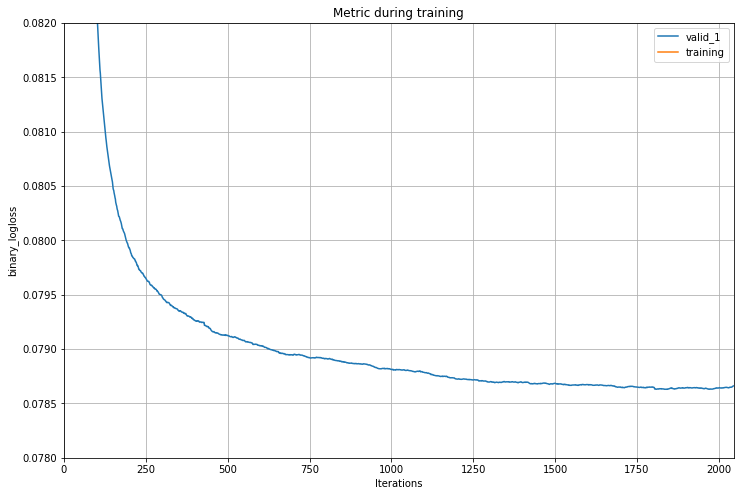

In [7]:
label = 'is_trade'
start_features =['item_category_list', 'item_price_level', 'item_sales_level', 'item_collected_level', 'user_gender_id', 'user_age_level', 'user_star_level', 'context_page_id', 'shop_review_positive_rate', 'shop_score_service', 'hour', 'day', 'user_id_query_day_hour', 'shop_id', 'user_id_query_day_item_brand_id', 'user_id_query_day_hour_item_brand_id', 'user_id_query_day', 'user_id_query_day_item_id', 'check_item_brand_id_ratio', 'check_shop_id_ratio', 'check_item_category_list_ratio', 'check_ratio_day_all', 'item_city_id_shop_cnt', 'item_city_id_shop_rev_prob', 'item_id_shop_rev_cnt', 'item_property_list0', 'item_pv_level_price_prob', 'item_collected_level_item_prob', 'item_sales_level_price_prob', 'item_city_id_cnt1d', 'item_collected_level_user_age_cnt', 'item_price_level_item_cnt', 'item_price_level_item_prob', 'user_id_shop_id_trade_meanxd', 'user_age_level_trade_meanxd']
clf = lgbm.LGBMClassifier(random_state=1, num_leaves = 6,n_estimators=20000,max_depth=3,learning_rate = 0.05, n_jobs=30)
clf = run(start_features, label, df2, clf, True)
lgbm.plot_importance(clf,figsize=(12,8),height=0.5)
plt.show()
lgbm.plot_metric(clf,figsize=(12,8),ylim=(0.078,0.082))
plt.show()

In [8]:
for i in df2.columns:
    print(i)

context_id
context_page_id
context_timestamp
instance_id
is_trade
item_brand_id
item_category_list
item_city_id
item_collected_level
item_id
item_price_level
item_property_list
item_pv_level
item_sales_level
predict_category_property
shop_id
shop_review_num_level
shop_review_positive_rate
shop_score_delivery
shop_score_description
shop_score_service
shop_star_level
user_age_level
user_gender_id
user_id
user_occupation_id
user_star_level
len_item_category
len_item_property
item_category_list1
item_category_list2
item_property_list0
item_property_list1
item_property_list2
item_property_list3
item_property_list4
item_property_list5
item_property_list6
item_property_list7
item_property_list8
item_property_list9
gender0
age0
occupation0
star0
hour
day
min
hour_map
hour_series
min_map
min_series
min_series_full
user_id_query_day
user_id_query_day_hour
user_id_query_day_hour_map
user_id_query_min_map
item_id_query_day
item_id_query_day_hour
item_id_query_day_hour_map
item_id_query_min_map
sho

In [15]:
lbgnode = (clf.apply(df2[start_features]) - 2.5)/2.5

In [16]:
a = LogisticRegression(n_jobs=-1, random_state=1, solver  = 'saga')
fm_model = xl.FMModel(task='binary', init=0.1, epoch=10, k=4, lr=0.1, 
                      reg_lambda=0.01, opt='sgd', metric='auc')

In [18]:
fm_model.fit(lbgnode[df2.context_timestamp <= '2018-09-23 23:59:59'], df2[df2.context_timestamp <= '2018-09-23 23:59:59'].is_trade, eval_set=[lbgnode[df2.context_timestamp > '2018-09-23 23:59:59'], df2[df2.context_timestamp > '2018-09-23 23:59:59'].is_trade])

Exception: failed to convert feature matrix X and label y to xlearn data format

In [ ]:
log_loss(df2[df2.context_timestamp <= '2018-09-23 23:59:59'].is_trade, a[df2.context_timestamp <= '2018-09-23 23:59:59'].predict_proba(t)[:,1])

In [ ]:
log_loss(df2[df2.context_timestamp > '2018-09-23 23:59:59'].is_trade, a[df2.context_timestamp => '2018-09-23 23:59:59'].predict_proba(t)[:,1])

In [19]:
lbgnode

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


array([[-0.6, -0.6, -0.6, ...,  1. ,  1. ,  1. ],
       [-0.6,  0.6, -0.6, ...,  1. ,  1. ,  1. ],
       [ 0.6, -0.2,  0.6, ...,  1. ,  1. ,  1. ],
       ...,
       [-0.6,  1. , -0.6, ...,  1. ,  1. ,  1. ],
       [-1. ,  1. , -1. , ...,  1. ,  1. ,  1. ],
       [ 0.2, -0.6,  0.2, ..., -1. ,  0.6, -0.6]])

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
